In [4]:
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

# Zeug

In [6]:
from p5control import InstrumentGateway, DataGateway

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

In [9]:
from p5control import InstrumentGateway, DataGateway

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'IV at base'
offset_name = 'offset'
sweep_name = 'sweep'
i = 10

try:
    while True:
        gw.adwin.setAveraging(50)
        gw.femtos.set_amplification_A(100)
        gw.femtos.set_amplification_B(1000)
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        m = gw.measure(f"{name}/{i:07d}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        for j in range(5):
            gw.adwin.setAmplitude(8)
            gw.adwin.setFrequency(0.053)
            gw.adwin.setLockinAmplitude(.1)
            gw.adwin.setLockinFrequency(73.3)
            m = gw.measure(f"{name}/{i:07d}/{sweep_name}_{j}")
            
            sleep(.5)
            m.start()
            gw.adwin.setSweeping(True)
            sleep(20)
            m.stop()

            sleep(1)
            gw.adwin.setSweeping(False)

        i+=1
except KeyboardInterrupt:
    try:
        m.stop()
    except:
        pass

In [3]:
from datetime import datetime
import numpy as np
timestamp = 1683599443.2752402

dt_object = datetime.fromtimestamp(timestamp)
print(dt_object)

2023-05-09 04:30:43.275240


In [10]:
from p5control import InstrumentGateway, DataGateway

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'IV at base'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(1000)
gw.adwin.setAmplitude(0)
gw.adwin.setSweeping(False)
m = gw.measure(f"{name}/{offset_name}")
sleep(.5)
m.start()
sleep(3)
m.stop()

gw.adwin.setAmplitude(8)
gw.adwin.setFrequency(0.053)
gw.adwin.setLockinAmplitude(.1)
gw.adwin.setLockinFrequency(73.3)
m = gw.measure(f"{name}/{sweep_name}_{j}")

sleep(.5)
m.start()
gw.adwin.setSweeping(True)
sleep(100)
m.stop()

sleep(1)
gw.adwin.setSweeping(False)

-4.121252697599132e-05 0.11136608186660259


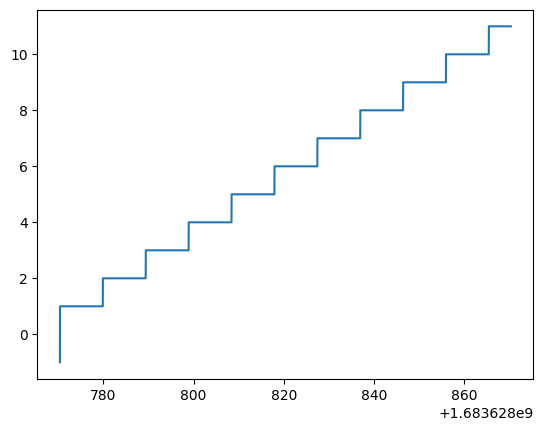

In [83]:
from p5control import InstrumentGateway, DataGateway

dgw = DataGateway()
dgw.connect()

offset = dgw.get_data(f"/measurement/{name}/{offset_name}/adwin")
sweep = dgw.get_data(f"/measurement/{name}/{sweep_name}_1/adwin")

import matplotlib.pyplot as plt

off_V1 = np.mean(offset['V1'])
off_V2 = np.mean(offset['V2'])

t = sweep['time']

V1 = sweep['V1'] - off_V1
V2 = sweep['V2'] - off_V2

voltage = V1 / 1000 #FemtoB [V]
current = V2 / 100 * 100 / 47000 # FemtoA, VD, R_ref [A]

trigger = sweep['trigger']

plt.plot(t, trigger)

new_trig = np.copy(trigger)
new_time = np.copy(t)

new_trig = np.array(new_trig, dtype='float64')
new_trig[new_trig<1] = np.nan
new_trig = new_trig%2

new_trig = np.abs(new_trig[1:]-new_trig[:-1])
new_time = t[1:]

logic = new_trig==0
new_trig[logic] = np.nan
new_time[logic] = np.nan

new_trig = new_trig[~np.isnan(new_trig)]
new_time = new_time[~np.isnan(new_time)]

print(off_V1, off_V2)



(1683628760.0, 1683628990.0)

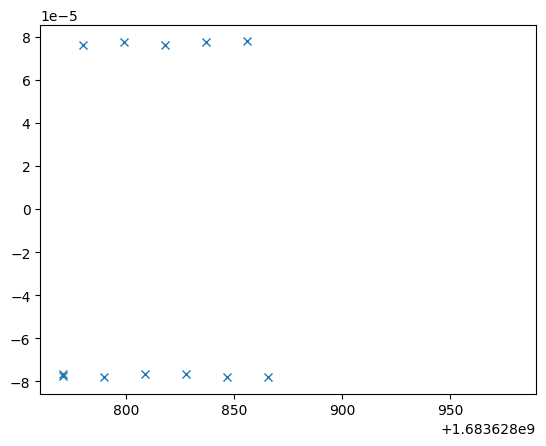

In [113]:
plt.plot(t, current,'x')
plt.xlim(1.68362876e+09,1.68362899e+09)
#plt.plot(voltage, current, '.')
#plt.plot(t, trigger)
# plt.plot(new_time[:], new_time/new_time, 'x')

In [1]:
#plt.plot(sweep['V1'],'.')
#plt.plot(V1,'.')
#plt.plot(voltage,'.')
plt.plot(current/voltage, voltage, '.')
plt.grid(True)

NameError: name 'plt' is not defined

# Magnetfeldabhängige Messungen

In [2]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

gw.magnet.goto_zero()

In [111]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

uH_soll = 1
name = 'test'
field_name = f'uH={uH_soll*1000:+.2f}mT'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(3)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(1000)
gw.adwin.setAmplitude(0)
gw.adwin.setSweeping(False)
m = gw.measure(f"{name}/{field_name}/{offset_name}")
sleep(.5)
m.start()
sleep(3)
m.stop()

gw.adwin.setAmplitude(0.25)
gw.adwin.setFrequency(0.053)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)
m = gw.measure(f"{name}/{field_name}/{sweep_name}")

sleep(.5)
m.start()
gw.adwin.setSweeping(True)
sleep(100)
m.stop()

sleep(1)
gw.adwin.setSweeping(False)

In [110]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

uH_range = np.linspace(-0.025, 0.025, 201)

gw.magnet.set_rate(0)

for i, uH_soll in enumerate(tqdm(uH_range)):
    # gw.magnet.set_target_field(uH_soll)
    # gw.magnet.ramp()
    # sleep(10)

    # do IV sweep

    
    field = f'uH={uH_soll*1000:+.2f}mT'



100%|██████████| 201/201 [00:00<00:00, 201495.01it/s]

uH=-25.00mT
uH=-24.75mT
uH=-24.50mT
uH=-24.25mT
uH=-24.00mT
uH=-23.75mT
uH=-23.50mT
uH=-23.25mT
uH=-23.00mT
uH=-22.75mT
uH=-22.50mT
uH=-22.25mT
uH=-22.00mT
uH=-21.75mT
uH=-21.50mT
uH=-21.25mT
uH=-21.00mT
uH=-20.75mT
uH=-20.50mT
uH=-20.25mT
uH=-20.00mT
uH=-19.75mT
uH=-19.50mT
uH=-19.25mT
uH=-19.00mT
uH=-18.75mT
uH=-18.50mT
uH=-18.25mT
uH=-18.00mT
uH=-17.75mT
uH=-17.50mT
uH=-17.25mT
uH=-17.00mT
uH=-16.75mT
uH=-16.50mT
uH=-16.25mT
uH=-16.00mT
uH=-15.75mT
uH=-15.50mT
uH=-15.25mT
uH=-15.00mT
uH=-14.75mT
uH=-14.50mT
uH=-14.25mT
uH=-14.00mT
uH=-13.75mT
uH=-13.50mT
uH=-13.25mT
uH=-13.00mT
uH=-12.75mT
uH=-12.50mT
uH=-12.25mT
uH=-12.00mT
uH=-11.75mT
uH=-11.50mT
uH=-11.25mT
uH=-11.00mT
uH=-10.75mT
uH=-10.50mT
uH=-10.25mT
uH=-10.00mT
uH=-9.75mT
uH=-9.50mT
uH=-9.25mT
uH=-9.00mT
uH=-8.75mT
uH=-8.50mT
uH=-8.25mT
uH=-8.00mT
uH=-7.75mT
uH=-7.50mT
uH=-7.25mT
uH=-7.00mT
uH=-6.75mT
uH=-6.50mT
uH=-6.25mT
uH=-6.00mT
uH=-5.75mT
uH=-5.50mT
uH=-5.25mT
uH=-5.00mT
uH=-4.75mT
uH=-4.50mT
uH=-4.25mT
uH=-4.00mT
uH=-

In [6]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(3)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(1000)
gw.adwin.setAmplitude(0)
gw.adwin.setSweeping(False)

gw.magnet.set_rate(0)

uH_range = np.linspace(-0.025, 0.025, 201)
for i, uH_soll in enumerate(tqdm(uH_range)):

    field_name = f'uH={uH_soll*1000:+.2f}mT'
    gw.magnet.set_target_field(uH_soll)
    gw.magnet.ramp()
    sleep(20)

    # do IV sweep  
    gw.adwin.setAmplitude(0)
    gw.adwin.setSweeping(False)
    m = gw.measure(f"{name}/{field_name}/{offset_name}")
    sleep(.5)
    m.start()
    sleep(3)
    m.stop()

    gw.adwin.setAmplitude(0.25)
    gw.adwin.setFrequency(0.053)
    gw.adwin.setLockinAmplitude(0)
    gw.adwin.setLockinFrequency(73.3)
    m = gw.measure(f"{name}/{field_name}/{sweep_name}")

    sleep(.5)
    m.start()
    gw.adwin.setSweeping(True)
    sleep(100)
    m.stop()
    
    gw.adwin.setAmplitude(0)
    gw.adwin.setSweeping(False)

100%|██████████| 201/201 [7:11:18<00:00, 128.75s/it]  


In [2]:
m.stop()

NameError: name 'm' is not defined

In [8]:
gw.magnet.set_target_field(0)
gw.magnet.ramp()

# Temperaturabhängige Messung

In [2]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'test'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(10000)
gw.femtos.set_amplification_B(10)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)
gw.adwin.setFrequency(0.053)

i = 0
try: 
    while True:
        i +=1
        subname = f'm{i:06d}'
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        m = gw.measure(f"{name}/{subname}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.25)
        m = gw.measure(f"{name}/{subname}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        sleep(20)
        m.stop()

        sleep(1)
        gw.adwin.setSweeping(False)

except KeyboardInterrupt:
    m.stop()

In [13]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'test'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(10000)
gw.femtos.set_amplification_B(10)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setAmplitude(0)

In [12]:
gw.adwin.setAmplitude(.025)

# Magnetfeldabhängige Messung PR-22ii-d-3

In [1]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

gw.magnet.goto_zero()

In [1]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

uH_soll = 0
name = 'test_ohne_probe'
field_name = f'uH={uH_soll*1000:+.2f}mT'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(100)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.adwin.setSweeping(False)
gw.adwin.setOutput(False)
gw.adwin.setAmplitude(0)
m = gw.measure(f"{name}/{field_name}/{offset_name}")
sleep(.5)
m.start()
sleep(5)
m.stop()

gw.adwin.setAmplitude(0.5)
gw.adwin.setPeriod(149.77)
m = gw.measure(f"{name}/{field_name}/{sweep_name}")

sleep(.5)
m.start()
gw.adwin.setSweeping(True)
gw.adwin.setOutput(True)
sleep(300)
m.stop()

sleep(1)
gw.adwin.setSweeping(False)
gw.adwin.setOutput(False)

# gw.magnet.goto_zero()

In [1]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(100)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.025, 0.025, 201)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(20)

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(5)
        m.stop()

        gw.adwin.setAmplitude(0.5)
        gw.adwin.setPeriod(149.77)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(1000)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 201/201 [57:21:46<00:00, 1027.40s/it]   


In [7]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

m = gw.measure()

# Magnetfeldmessung High field


In [2]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(1000)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.04, 0.04, 321)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(20)

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.25)
        gw.adwin.setPeriod(18.8679)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(100)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 321/321 [11:06:07<00:00, 124.51s/it]  


In [3]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(1000)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.04, 0.04, 321)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(20)

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.25)
        gw.adwin.setPeriod(18.8679)
        
        gw.adwin.setLocking(True)
        gw.adwin.setLockinAmplitude(0.001)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(100)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 321/321 [11:06:08<00:00, 124.51s/it]  


# Temperaturabhängige Messung

In [2]:
i = 3371+1

In [3]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical temperature'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(1000)
gw.femtos.set_amplification_B(100)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

try:
    while True:
        i = i + 1
        index_name = f'{i:08d}'

        # do IV sweep  

        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)

        m = gw.measure(f"{name}/{index_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.35)
        gw.adwin.setPeriod(30)
        
        m = gw.measure(f"{name}/{index_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(121)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except KeyboardInterrupt:
    try:
        m.stop()
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
    except:
        pass

In [4]:

gw.adwin.setAmplitude(0)
gw.adwin.setSweeping(False)
gw.adwin.setOutput(False)

first measurement is corrupted. femto A and B are vertauscht
Stopped Circulation at 16:28 Uhr

unterbrechung at i = 525, 23.06.23 10:36
unterbrechung at i = 2255, 25.06.23 20:05
ungeklärte Ursache, log springt von 20:05 auf 20:18, Loch in Daten von LakeShore, evtl. Windows Speicher voll?
unterbrachung at i = 2256-7? neuer server @ _4 i=2255
unterbrechung at i = 3371, without crashing _4, neuer server _5

# Critical Temperature Cool Down

.data/TIV-Messung_2023-07-06.hdf5

In [1]:
i=0

In [2]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical temperature'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(1000)
gw.femtos.set_amplification_B(100)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

try:
    while True:
        i = i + 1
        index_name = f'{i:08d}'

        # do IV sweep  

        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)

        m = gw.measure(f"{name}/{index_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.35)
        gw.adwin.setPeriod(10)
        
        m = gw.measure(f"{name}/{index_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(121)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except KeyboardInterrupt:
    try:
        m.stop()
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
    except:
        pass

# Critical Field 200Ohm oder 4000? keine ahnung. High impedance setup, 1:100 Sannungsteiler
'.data/2023-07-06-HIV-200Ohm_0.hdf5'


In [7]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field 2'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(1000)
gw.femtos.set_amplification_B(1000)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    gw.magnet.set_target_field(uH_range[0])
    gw.magnet.ramp()
    sleep(10)
    
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(5)

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.6)
        gw.adwin.setPeriod(37.8679)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(200)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 241/241 [14:04:51<00:00, 210.34s/it]  


# High Frequency Study at 4 kOhm

In [24]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'high_frequency_4'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(10000)
gw.femtos.set_amplification_B(1000)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.vna.setPower(10)

nu_soll_0 = np.zeros(1)
nu_soll_1 = np.linspace(.1, 40, 400)
nu_soll_2 = np.linspace(0.0001, 0.001, 91)
nu_soll_3 = np.linspace(0.002, 0.01, 9)
nu_soll_4 = np.linspace(0.02, 0.09, 8)

nu_soll = np.concatenate([
    nu_soll_0, 
    nu_soll_2, 
    nu_soll_3, 
    nu_soll_4, 
    nu_soll_1
    ])

try:
    for i, nu in enumerate(tqdm(nu_soll)):
        field_name = f'nu={nu:+.5f}GHz'
        if nu==0:
            gw.vna.setOutput(False)
        else:
            gw.vna.setTSweepFrequency(float(nu)*1e9)
            gw.vna.setPower(10)
            gw.vna.setOutput(True)

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(2)
        m.stop()

        gw.adwin.setAmplitude(0.6)
        gw.adwin.setPeriod(30)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(31)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.vna.setOutput(False)

    try:
        m.stop()
    except:
        pass


gw.adwin.setOutput(False)
gw.vna.setOutput(False)

  0%|          | 0/509 [00:00<?, ?it/s]

100%|██████████| 509/509 [4:59:02<00:00, 35.25s/it]  


In [23]:

gw.vna.setPower(10)

nu_soll_0 = np.zeros(1)
nu_soll_1 = np.linspace(.1, 40, 400)
nu_soll_2 = np.linspace(0.0001, 0.001, 91)
nu_soll_3 = np.linspace(0.002, 0.01, 9)
nu_soll_4 = np.linspace(0.02, 0.09, 8)

nu_soll = np.concatenate([
    nu_soll_0, 
    nu_soll_2, 
    nu_soll_3, 
    nu_soll_4, 
    nu_soll_1
    ])

try:
    for i, nu in enumerate(tqdm(nu_soll)):
        field_name = f'nu={nu:+.5f}GHz'
        if nu==0:
            gw.vna.setOutput(False)
        else:
            gw.vna.setTSweepFrequency(float(nu)*1e9)
            gw.vna.setPower(10)
            gw.vna.setOutput(True)
        sleep(1)
except:
    pass

  0%|          | 0/509 [00:00<?, ?it/s]

 16%|█▌        | 80/509 [01:22<07:20,  1.03s/it]


# Critical Field 16 kOhm. High impedance setup, 1:100 Sannungsteiler
'.data/2023-07-10-HIV-16000_0.hdf5'


In [25]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(1000)
gw.femtos.set_amplification_B(1000)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    gw.magnet.set_target_field(uH_range[0])
    gw.magnet.ramp()
    sleep(10)
    
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(5)

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.6)
        gw.adwin.setPeriod(37.8679)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(200)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 241/241 [14:05:40<00:00, 210.54s/it]  


# HIV @ 32 kOhm
'.data/2023-07-11_HIV-32000_1.hdf5' - magnet hat nicht funktioniert, da quench während stromausfall

In [ ]:
# '.data/2023-07-14_HIV-32000_0.hdf5' neue messung

In [8]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(1000)
gw.femtos.set_amplification_B(1000)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    gw.magnet.set_target_field(uH_range[0])
    gw.magnet.ramp()
    sleep(300)
    gw.magnet.pause()
    
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(5)
        gw.magnet.pause()

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.6)
        gw.adwin.setPeriod(37.8679)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(200)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 241/241 [14:05:08<00:00, 210.41s/it]  


In [ ]:
freqs = [10, 15, 20]
powers = []

# Power Study

In [3]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(1000)
gw.femtos.set_amplification_B(1000)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

frequencies = [10, 15, 20]
# powers = [5, 0, -5, -10, -15, -20, -25, -30]
powers = [4, 3, 2, 1, -1, -2, -3, -4, -6, -7, -8, -9, -11, -12, -13, -14, -16, -17, -18, -19, -21, -22, -23, -24]

name = 'power study'
offset_name = 'offset'
sweep_name = 'sweep'

# # do IV sweep  
# gw.adwin.setSweeping(False)
# gw.adwin.setOutput(False)
# gw.adwin.setAmplitude(0)
# m = gw.measure(f"{name}/zero Hf/{offset_name}")
# sleep(.5)
# m.start()
# sleep(2)
# m.stop()

# gw.adwin.setAmplitude(0.6)
# gw.adwin.setPeriod(30)
# m = gw.measure(f"{name}/zero Hf/{sweep_name}")

# sleep(.5)
# m.start()
# gw.adwin.setSweeping(True)
# gw.adwin.setOutput(True)
# sleep(31)
# m.stop()

# gw.adwin.setAmplitude(0)
# gw.adwin.setSweeping(False)
# gw.adwin.setOutput(False)

try:
    for f, freq in enumerate(frequencies):
        frequency_name = f'f={freq:+2.0f}GHz'

        gw.vna.setTSweepFrequency(float(freq)*1e9)

        for p, power in enumerate(tqdm(powers)):
            power_name = f'P={power:+2.0f}dbm'
            
            gw.vna.setPower(power)
            gw.vna.setOutput(True)
            
            # do IV sweep  
            gw.adwin.setSweeping(False)
            gw.adwin.setOutput(False)
            gw.adwin.setAmplitude(0)
            m = gw.measure(f"{name}/{frequency_name}/{power_name}/{offset_name}")
            sleep(.5)
            m.start()
            sleep(2)
            m.stop()

            gw.adwin.setAmplitude(0.6)
            gw.adwin.setPeriod(30)
            m = gw.measure(f"{name}/{frequency_name}/{power_name}/{sweep_name}")

            sleep(.5)
            m.start()
            gw.adwin.setSweeping(True)
            gw.adwin.setOutput(True)
            sleep(31)
            m.stop()
            
            gw.adwin.setAmplitude(0)
            gw.adwin.setSweeping(False)
            gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.vna.setOutput(False)

    try:
        m.stop()
    except:
        pass


gw.adwin.setOutput(False)
gw.vna.setOutput(False)

  0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 24/24 [14:07<00:00, 35.31s/it]


# HIV Study 160 kOhm
'.data/2023-07-17_HIV-160kOhm_1.hdf5'

In [5]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(1000)
gw.femtos.set_amplification_B(1000)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    gw.magnet.set_target_field(uH_range[0])
    gw.magnet.ramp()
    sleep(300)
    gw.magnet.pause()
    
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(5)
        gw.magnet.pause()

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.6)
        gw.adwin.setPeriod(37.8679)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(200)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 241/241 [14:05:19<00:00, 210.46s/it]  


# strong HIV map
'.data/2023-07-19_strong_HIV-160kOhm_0.hdf5'

In [6]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(1000)
gw.femtos.set_amplification_B(1000)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(7,0, 141)
    gw.magnet.set_target_field(uH_range[0])
    gw.magnet.ramp()
    sleep(1000)
    gw.magnet.pause()
    
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.1f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(20)
        gw.magnet.pause()

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.6)
        gw.adwin.setPeriod(37.8679)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(200)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

# 12.5 kOhm Magnet Study
'.data/2023-07-20_HIV_12500Ohm_0.hdf5'

In [1]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(5)
gw.femtos.set_amplification_A(1000)
gw.femtos.set_amplification_B(1000)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    gw.magnet.set_target_field(uH_range[0])
    gw.magnet.ramp()
    sleep(300)
    gw.magnet.pause()
    
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(5)
        gw.magnet.pause()

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.6)
        gw.adwin.setPeriod(37.8679)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(200)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 241/241 [14:05:44<00:00, 210.56s/it]  


# Magnet test

In [5]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    gw.magnet.set_target_field(uH_range[0])
    gw.magnet.ramp()
    sleep(10)
    gw.magnet.pause()
    
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(5)
        gw.magnet.pause()
        sleep(3)

except:
    gw.magnet.goto_zero()

gw.magnet.goto_zero()

 54%|█████▍    | 131/241 [18:26<15:29,  8.45s/it]


AttributeError: 'InstrumentGateway' object has no attribute 'magnet'

# New Cooldown August 2023: New Samle

In [3]:
# duration for 25 mT
# 201/201 [57:21:46<00:00, 1027.40s/it] 
1027*201/3600

57.340833333333336

In [5]:
# duration for 30 mT 
# 321/321 [11:06:07<00:00, 124.51s/it]  
125*321/3600

11.145833333333334

In [8]:
# duration for 30 mT 
# 321/321 [11:06:07<00:00, 124.51s/it]  
19*241/3600*7

8.903611111111111

In [1]:
18.6879*6

112.1274

In [1]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(1.0) # 1 Volt to cross both critical currents
        gw.adwin.setPeriod(18.8679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(195)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

 63%|██████▎   | 153/241 [8:33:30<4:55:24, 201.42s/it]

In [2]:
# Do it again as file is corrupted: reduce from 10 to 7 sweeps, to start new measurement at 1:00

from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(1.0) # 1 Volt to cross both critical currents
        gw.adwin.setPeriod(18.8679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(120)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 241/241 [8:27:38<00:00, 126.38s/it]  


In [2]:
# Quick and dirty with only passing 1 I_c:
# Don't drive magnet bevore !

# Temperature at almost 300 mK - Inner region: 190 mK

from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.025, 0.025, 201)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.6) 
        gw.adwin.setPeriod(4.1679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(55)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 201/201 [3:25:29<00:00, 61.34s/it]  


# 3 Quick Measurements 

In [5]:
np.linspace(-0.025, 0.025, 1)

array([-0.025])

In [6]:
# TEST

from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field TEST'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.025, 0.025, 1)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.7) 
        gw.adwin.setPeriod(4.1679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(55)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 1/1 [01:01<00:00, 61.89s/it]


In [7]:
# 0.7 V

# Quick and dirty with only passing 1 I_c:
# Don't drive magnet bevore !

# Temperature at almost 300 mK - Inner region: 190 mK

from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field 0.7 V'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.025, 0.025, 201)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.7) 
        gw.adwin.setPeriod(4.1679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(55)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 201/201 [3:25:43<00:00, 61.41s/it]  


In [8]:
# 0.8 V

# Quick and dirty with only passing 1 I_c:
# Don't drive magnet bevore !

# Temperature at almost 300 mK - Inner region: 190 mK

from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field 0.8 V'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.025, 0.025, 201)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.8) 
        gw.adwin.setPeriod(4.1679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(55)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 201/201 [3:25:41<00:00, 61.40s/it]  


In [9]:
# 0.9 V

# Quick and dirty with only passing 1 I_c:
# Don't drive magnet bevore !

# Temperature at almost 300 mK - Inner region: 190 mK

from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field 0.9 V'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.025, 0.025, 201)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.9) 
        gw.adwin.setPeriod(4.1679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(55)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 201/201 [3:26:05<00:00, 61.52s/it]  


# Microwave stuff

## Antenna


In [10]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'high_frequency'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.vna.setPower(0)


nu_soll = np.linspace(0, 40, 401)
nu_soll[0] = 0.0001
try:
    for i, nu in enumerate(tqdm(nu_soll)):
        print(nu)
        field_name = f'nu={i:+.2f}GHz'
        gw.vna.setTSweepFrequency(float(nu)*1e9)
        gw.vna.setOutput(True)

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(5)
        m.stop()

        gw.adwin.setAmplitude(1)
        gw.adwin.setPeriod(18.8679)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(160)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.vna.setOutput(False)


gw.adwin.setOutput(False)
gw.vna.setOutput(False)

  0%|          | 0/401 [00:00<?, ?it/s]

0.0001


  0%|          | 1/401 [02:47<18:37:31, 167.63s/it]

0.1


  0%|          | 2/401 [05:34<18:33:05, 167.38s/it]

0.2


  1%|          | 3/401 [08:22<18:29:38, 167.28s/it]

0.30000000000000004


  1%|          | 4/401 [11:09<18:27:05, 167.32s/it]

0.4


  1%|          | 5/401 [13:56<18:23:23, 167.18s/it]

0.5


  1%|▏         | 6/401 [16:43<18:20:27, 167.16s/it]

0.6000000000000001


  2%|▏         | 7/401 [19:30<18:18:00, 167.21s/it]

0.7000000000000001


  2%|▏         | 8/401 [22:18<18:15:25, 167.24s/it]

0.8


  2%|▏         | 9/401 [25:05<18:12:31, 167.22s/it]

0.9


  2%|▏         | 10/401 [27:52<18:09:49, 167.24s/it]

1.0


  3%|▎         | 11/401 [30:39<18:07:16, 167.27s/it]

1.1


  3%|▎         | 12/401 [33:27<18:04:14, 167.24s/it]

1.2000000000000002


  3%|▎         | 13/401 [36:14<18:01:43, 167.28s/it]

1.3


  3%|▎         | 14/401 [39:01<17:58:55, 167.28s/it]

1.4000000000000001


  4%|▎         | 15/401 [41:48<17:55:56, 167.24s/it]

1.5


  4%|▍         | 16/401 [44:36<17:53:05, 167.24s/it]

1.6


  4%|▍         | 17/401 [47:23<17:50:18, 167.24s/it]

1.7000000000000002


  4%|▍         | 18/401 [50:10<17:47:21, 167.21s/it]

1.8


  5%|▍         | 19/401 [52:57<17:44:39, 167.22s/it]

1.9000000000000001


  5%|▍         | 20/401 [55:44<17:41:39, 167.19s/it]

2.0


  5%|▌         | 21/401 [58:31<17:38:43, 167.17s/it]

2.1


  5%|▌         | 22/401 [1:01:18<17:35:20, 167.07s/it]

2.2


  6%|▌         | 23/401 [1:04:06<17:33:03, 167.15s/it]

2.3000000000000003


  6%|▌         | 24/401 [1:06:53<17:30:15, 167.15s/it]

2.4000000000000004


  6%|▌         | 25/401 [1:09:40<17:27:29, 167.15s/it]

2.5


  6%|▋         | 26/401 [1:12:27<17:24:55, 167.19s/it]

2.6


  7%|▋         | 27/401 [1:15:14<17:21:21, 167.06s/it]

2.7


  7%|▋         | 28/401 [1:18:01<17:18:46, 167.09s/it]

2.8000000000000003


  7%|▋         | 29/401 [1:20:48<17:16:15, 167.14s/it]

2.9000000000000004


  7%|▋         | 30/401 [1:23:36<17:13:44, 167.18s/it]

3.0


  8%|▊         | 31/401 [1:26:23<17:10:51, 167.17s/it]

3.1


  8%|▊         | 32/401 [1:29:10<17:08:25, 167.22s/it]

3.2


  8%|▊         | 33/401 [1:31:57<17:05:26, 167.19s/it]

3.3000000000000003


  8%|▊         | 34/401 [1:34:44<17:02:35, 167.18s/it]

3.4000000000000004


  9%|▊         | 35/401 [1:37:32<17:00:00, 167.21s/it]

3.5


  9%|▉         | 36/401 [1:40:19<16:57:16, 167.22s/it]

3.6


  9%|▉         | 37/401 [1:43:06<16:54:23, 167.21s/it]

3.7


  9%|▉         | 38/401 [1:45:53<16:51:46, 167.24s/it]

3.8000000000000003


 10%|▉         | 39/401 [1:48:41<16:48:56, 167.23s/it]

3.9000000000000004


 10%|▉         | 40/401 [1:51:28<16:46:01, 167.21s/it]

4.0


 10%|█         | 41/401 [1:54:15<16:43:25, 167.24s/it]

4.1000000000000005


 10%|█         | 42/401 [1:57:02<16:40:39, 167.24s/it]

4.2


 11%|█         | 43/401 [1:59:49<16:37:43, 167.22s/it]

4.3


 11%|█         | 44/401 [2:02:36<16:34:12, 167.09s/it]

4.4


 11%|█         | 45/401 [2:05:23<16:31:32, 167.11s/it]

4.5


 11%|█▏        | 46/401 [2:08:11<16:28:55, 167.14s/it]

4.6000000000000005


 12%|█▏        | 47/401 [2:10:58<16:26:08, 167.14s/it]

4.7


 12%|█▏        | 48/401 [2:13:45<16:23:34, 167.18s/it]

4.800000000000001


 12%|█▏        | 49/401 [2:16:32<16:20:09, 167.07s/it]

4.9


 12%|█▏        | 50/401 [2:19:19<16:17:30, 167.10s/it]

5.0


 13%|█▎        | 51/401 [2:22:06<16:15:07, 167.16s/it]

5.1000000000000005


 13%|█▎        | 52/401 [2:24:54<16:12:22, 167.17s/it]

5.2


 13%|█▎        | 53/401 [2:27:41<16:09:31, 167.16s/it]

5.300000000000001


 13%|█▎        | 54/401 [2:30:28<16:07:13, 167.24s/it]

5.4


 14%|█▎        | 55/401 [2:33:15<16:04:25, 167.24s/it]

5.5


 14%|█▍        | 56/401 [2:36:02<16:01:23, 167.20s/it]

5.6000000000000005


 14%|█▍        | 57/401 [2:38:50<15:58:49, 167.24s/it]

5.7


 14%|█▍        | 58/401 [2:41:37<15:56:01, 167.23s/it]

5.800000000000001


 15%|█▍        | 59/401 [2:44:24<15:53:03, 167.20s/it]

5.9


 15%|█▍        | 60/401 [2:47:11<15:50:27, 167.24s/it]

6.0


 15%|█▌        | 61/401 [2:49:59<15:47:30, 167.21s/it]

6.1000000000000005


 15%|█▌        | 62/401 [2:52:46<15:44:34, 167.18s/it]

6.2


 16%|█▌        | 63/401 [2:55:33<15:41:58, 167.21s/it]

6.300000000000001


 16%|█▌        | 64/401 [2:58:20<15:39:22, 167.25s/it]

6.4


 16%|█▌        | 65/401 [3:01:07<15:36:24, 167.22s/it]

6.5


 16%|█▋        | 66/401 [3:03:54<15:33:04, 167.12s/it]

6.6000000000000005


 17%|█▋        | 67/401 [3:06:42<15:30:33, 167.16s/it]

6.7


 17%|█▋        | 68/401 [3:09:29<15:27:43, 167.16s/it]

6.800000000000001


 17%|█▋        | 69/401 [3:12:16<15:24:54, 167.15s/it]

6.9


 17%|█▋        | 70/401 [3:15:03<15:22:21, 167.19s/it]

7.0


 18%|█▊        | 71/401 [3:17:50<15:19:10, 167.12s/it]

7.1000000000000005


 18%|█▊        | 72/401 [3:20:37<15:16:23, 167.12s/it]

7.2


 18%|█▊        | 73/401 [3:23:25<15:13:51, 167.17s/it]

7.300000000000001


 18%|█▊        | 74/401 [3:26:12<15:11:29, 167.25s/it]

7.4


 19%|█▊        | 75/401 [3:28:59<15:08:29, 167.21s/it]

7.5


 19%|█▉        | 76/401 [3:31:46<15:05:44, 167.21s/it]

7.6000000000000005


 19%|█▉        | 77/401 [3:34:34<15:03:01, 167.23s/it]

7.7


 19%|█▉        | 78/401 [3:37:21<15:00:06, 167.20s/it]

7.800000000000001


 20%|█▉        | 79/401 [3:40:08<14:57:29, 167.23s/it]

7.9


 20%|█▉        | 80/401 [3:42:55<14:54:50, 167.26s/it]

8.0


 20%|██        | 81/401 [3:45:43<14:51:50, 167.22s/it]

8.1


 20%|██        | 82/401 [3:48:30<14:49:09, 167.24s/it]

8.200000000000001


 21%|██        | 83/401 [3:51:17<14:46:15, 167.22s/it]

8.3


 21%|██        | 84/401 [3:54:04<14:43:21, 167.20s/it]

8.4


 21%|██        | 85/401 [3:56:51<14:40:47, 167.24s/it]

8.5


 21%|██▏       | 86/401 [3:59:39<14:38:16, 167.29s/it]

8.6


 22%|██▏       | 87/401 [4:02:26<14:35:16, 167.25s/it]

8.700000000000001


 22%|██▏       | 88/401 [4:05:13<14:31:54, 167.14s/it]

8.8


 22%|██▏       | 89/401 [4:08:00<14:29:21, 167.18s/it]

8.9


 22%|██▏       | 90/401 [4:10:47<14:26:32, 167.18s/it]

9.0


 23%|██▎       | 91/401 [4:13:35<14:23:44, 167.18s/it]

9.1


 23%|██▎       | 92/401 [4:16:22<14:21:01, 167.19s/it]

9.200000000000001


 23%|██▎       | 93/401 [4:19:09<14:17:35, 167.06s/it]

9.3


 23%|██▎       | 94/401 [4:21:56<14:14:54, 167.08s/it]

9.4


 24%|██▎       | 95/401 [4:24:43<14:12:25, 167.14s/it]

9.5


 24%|██▍       | 96/401 [4:27:30<14:09:57, 167.20s/it]

9.600000000000001


 24%|██▍       | 97/401 [4:30:17<14:07:05, 167.19s/it]

9.700000000000001


 24%|██▍       | 98/401 [4:33:05<14:04:30, 167.23s/it]

9.8


 25%|██▍       | 99/401 [4:35:52<14:01:38, 167.21s/it]

9.9


 25%|██▍       | 100/401 [4:38:39<13:58:46, 167.20s/it]

10.0


 25%|██▌       | 101/401 [4:41:26<13:56:12, 167.24s/it]

10.100000000000001


 25%|██▌       | 102/401 [4:44:14<13:53:32, 167.26s/it]

10.200000000000001


 26%|██▌       | 103/401 [4:47:01<13:50:31, 167.22s/it]

10.3


 26%|██▌       | 104/401 [4:49:48<13:47:51, 167.25s/it]

10.4


 26%|██▌       | 105/401 [4:52:35<13:45:10, 167.27s/it]

10.5


 26%|██▋       | 106/401 [4:55:23<13:42:14, 167.24s/it]

10.600000000000001


 27%|██▋       | 107/401 [4:58:10<13:39:41, 167.28s/it]

10.700000000000001


 27%|██▋       | 108/401 [5:00:57<13:36:54, 167.29s/it]

10.8


 27%|██▋       | 109/401 [5:03:44<13:33:55, 167.24s/it]

10.9


 27%|██▋       | 110/401 [5:06:31<13:30:26, 167.10s/it]

11.0


 28%|██▊       | 111/401 [5:09:19<13:27:56, 167.16s/it]

11.100000000000001


 28%|██▊       | 112/401 [5:12:06<13:25:07, 167.15s/it]

11.200000000000001


 28%|██▊       | 113/401 [5:14:53<13:22:21, 167.16s/it]

11.3


 28%|██▊       | 114/401 [5:17:40<13:19:42, 167.19s/it]

11.4


 29%|██▊       | 115/401 [5:20:27<13:16:26, 167.09s/it]

11.5


 29%|██▉       | 116/401 [5:23:14<13:13:44, 167.10s/it]

11.600000000000001


 29%|██▉       | 117/401 [5:26:01<13:11:09, 167.15s/it]

11.700000000000001


 29%|██▉       | 118/401 [5:28:49<13:08:32, 167.18s/it]

11.8


 30%|██▉       | 119/401 [5:31:36<13:05:42, 167.17s/it]

11.9


 30%|██▉       | 120/401 [5:34:23<13:03:03, 167.20s/it]

12.0


 30%|███       | 121/401 [5:37:10<13:00:18, 167.21s/it]

12.100000000000001


 30%|███       | 122/401 [5:39:57<12:57:27, 167.19s/it]

12.200000000000001


 31%|███       | 123/401 [5:42:45<12:54:41, 167.20s/it]

12.3


 31%|███       | 124/401 [5:45:32<12:52:03, 167.23s/it]

12.4


 31%|███       | 125/401 [5:48:19<12:49:08, 167.20s/it]

12.5


 31%|███▏      | 126/401 [5:51:06<12:46:34, 167.25s/it]

12.600000000000001


 32%|███▏      | 127/401 [5:53:54<12:43:48, 167.26s/it]

12.700000000000001


 32%|███▏      | 128/401 [5:56:41<12:40:53, 167.23s/it]

12.8


 32%|███▏      | 129/401 [5:59:28<12:38:17, 167.27s/it]

12.9


 32%|███▏      | 130/401 [6:02:16<12:35:31, 167.28s/it]

13.0


 33%|███▎      | 131/401 [6:05:03<12:32:32, 167.23s/it]

13.100000000000001


 33%|███▎      | 132/401 [6:07:49<12:29:09, 167.10s/it]

13.200000000000001


 33%|███▎      | 133/401 [6:10:37<12:26:51, 167.21s/it]

13.3


 33%|███▎      | 134/401 [6:13:24<12:23:58, 167.18s/it]

13.4


 34%|███▎      | 135/401 [6:16:11<12:21:06, 167.17s/it]

13.5


 34%|███▍      | 136/401 [6:18:58<12:18:29, 167.21s/it]

13.600000000000001


 34%|███▍      | 137/401 [6:21:45<12:15:09, 167.08s/it]

13.700000000000001


 34%|███▍      | 138/401 [6:24:32<12:12:25, 167.09s/it]

13.8


 35%|███▍      | 139/401 [6:27:20<12:10:10, 167.21s/it]

13.9


 35%|███▍      | 140/401 [6:30:07<12:07:13, 167.18s/it]

14.0


 35%|███▌      | 141/401 [6:32:55<12:04:55, 167.29s/it]

14.100000000000001


 35%|███▌      | 142/401 [6:35:42<12:02:27, 167.37s/it]

14.200000000000001


 36%|███▌      | 143/401 [6:38:29<11:59:20, 167.29s/it]

14.3


 36%|███▌      | 144/401 [6:41:16<11:56:21, 167.24s/it]

14.4


 36%|███▌      | 145/401 [6:44:03<11:53:27, 167.22s/it]

14.5


 36%|███▋      | 146/401 [6:46:51<11:50:53, 167.27s/it]

14.600000000000001


 37%|███▋      | 147/401 [6:49:38<11:47:54, 167.22s/it]

14.700000000000001


 37%|███▋      | 148/401 [6:52:25<11:45:01, 167.20s/it]

14.8


 37%|███▋      | 149/401 [6:55:12<11:42:11, 167.19s/it]

14.9


 37%|███▋      | 150/401 [6:57:59<11:39:21, 167.18s/it]

15.0


 38%|███▊      | 151/401 [7:00:47<11:36:32, 167.17s/it]

15.100000000000001


 38%|███▊      | 152/401 [7:03:34<11:33:49, 167.19s/it]

15.200000000000001


 38%|███▊      | 153/401 [7:06:21<11:31:01, 167.18s/it]

15.3


 38%|███▊      | 154/401 [7:09:08<11:27:38, 167.04s/it]

15.4


 39%|███▊      | 155/401 [7:11:55<11:25:00, 167.07s/it]

15.5


 39%|███▉      | 156/401 [7:14:42<11:22:18, 167.09s/it]

15.600000000000001


 39%|███▉      | 157/401 [7:17:29<11:19:37, 167.12s/it]

15.700000000000001


 39%|███▉      | 158/401 [7:20:16<11:16:50, 167.12s/it]

15.8


 40%|███▉      | 159/401 [7:23:03<11:13:43, 167.04s/it]

15.9


 40%|███▉      | 160/401 [7:25:50<11:11:02, 167.06s/it]

16.0


 40%|████      | 161/401 [7:28:38<11:08:30, 167.13s/it]

16.1


 40%|████      | 162/401 [7:31:25<11:05:43, 167.13s/it]

16.2


 41%|████      | 163/401 [7:34:12<11:02:56, 167.13s/it]

16.3


 41%|████      | 164/401 [7:36:59<11:00:12, 167.14s/it]

16.400000000000002


 41%|████      | 165/401 [7:39:46<10:57:27, 167.15s/it]

16.5


 41%|████▏     | 166/401 [7:42:33<10:54:37, 167.14s/it]

16.6


 42%|████▏     | 167/401 [7:45:20<10:51:50, 167.14s/it]

16.7


 42%|████▏     | 168/401 [7:48:08<10:49:04, 167.14s/it]

16.8


 42%|████▏     | 169/401 [7:50:55<10:46:17, 167.14s/it]

16.900000000000002


 42%|████▏     | 170/401 [7:53:42<10:43:31, 167.15s/it]

17.0


 43%|████▎     | 171/401 [7:56:29<10:40:45, 167.16s/it]

17.1


 43%|████▎     | 172/401 [7:59:16<10:37:57, 167.15s/it]

17.2


 43%|████▎     | 173/401 [8:02:03<10:35:14, 167.17s/it]

17.3


 43%|████▎     | 174/401 [8:04:50<10:32:26, 167.17s/it]

17.400000000000002


 44%|████▎     | 175/401 [8:07:38<10:29:38, 167.16s/it]

17.5


 44%|████▍     | 176/401 [8:10:24<10:26:21, 167.03s/it]

17.6


 44%|████▍     | 177/401 [8:13:11<10:23:40, 167.06s/it]

17.7


 44%|████▍     | 178/401 [8:15:59<10:20:59, 167.08s/it]

17.8


 45%|████▍     | 179/401 [8:18:46<10:18:16, 167.10s/it]

17.900000000000002


 45%|████▍     | 180/401 [8:21:33<10:15:36, 167.13s/it]

18.0


 45%|████▌     | 181/401 [8:24:20<10:12:25, 167.02s/it]

18.1


 45%|████▌     | 182/401 [8:27:07<10:09:44, 167.05s/it]

18.2


 46%|████▌     | 183/401 [8:29:54<10:07:06, 167.10s/it]

18.3


 46%|████▌     | 184/401 [8:32:41<10:04:31, 167.15s/it]

18.400000000000002


 46%|████▌     | 185/401 [8:35:28<10:01:44, 167.15s/it]

18.5


 46%|████▋     | 186/401 [8:38:16<9:58:58, 167.15s/it] 

18.6


 47%|████▋     | 187/401 [8:41:03<9:56:08, 167.14s/it]

18.7


 47%|████▋     | 188/401 [8:43:50<9:53:19, 167.13s/it]

18.8


 47%|████▋     | 189/401 [8:46:37<9:50:40, 167.17s/it]

18.900000000000002


 47%|████▋     | 190/401 [8:49:24<9:48:02, 167.22s/it]

19.0


 48%|████▊     | 191/401 [8:52:12<9:45:10, 167.19s/it]

19.1


 48%|████▊     | 192/401 [8:54:59<9:42:19, 167.18s/it]

19.200000000000003


 48%|████▊     | 193/401 [8:57:46<9:39:32, 167.17s/it]

19.3


 48%|████▊     | 194/401 [9:00:33<9:36:42, 167.16s/it]

19.400000000000002


 49%|████▊     | 195/401 [9:03:20<9:34:02, 167.20s/it]

19.5


 49%|████▉     | 196/401 [9:06:08<9:31:15, 167.20s/it]

19.6


 49%|████▉     | 197/401 [9:08:55<9:28:23, 167.17s/it]

19.700000000000003


 49%|████▉     | 198/401 [9:11:41<9:25:13, 167.06s/it]

19.8


 50%|████▉     | 199/401 [9:14:29<9:22:31, 167.09s/it]

19.900000000000002


 50%|████▉     | 200/401 [9:17:16<9:19:46, 167.10s/it]

20.0


 50%|█████     | 201/401 [9:20:03<9:17:02, 167.11s/it]

20.1


 50%|█████     | 202/401 [9:22:50<9:14:20, 167.14s/it]

20.200000000000003


 51%|█████     | 203/401 [9:25:37<9:11:07, 167.01s/it]

20.3


 51%|█████     | 204/401 [9:28:24<9:08:27, 167.04s/it]

20.400000000000002


 51%|█████     | 205/401 [9:31:11<9:05:47, 167.08s/it]

20.5


 51%|█████▏    | 206/401 [9:33:58<9:03:03, 167.10s/it]

20.6


 52%|█████▏    | 207/401 [9:36:45<9:00:20, 167.11s/it]

20.700000000000003


 52%|█████▏    | 208/401 [9:39:33<8:57:38, 167.14s/it]

20.8


 52%|█████▏    | 209/401 [9:42:20<8:54:58, 167.18s/it]

20.900000000000002


 52%|█████▏    | 210/401 [9:45:07<8:52:09, 167.17s/it]

21.0


 53%|█████▎    | 211/401 [9:47:54<8:49:20, 167.16s/it]

21.1


 53%|█████▎    | 212/401 [9:50:41<8:46:36, 167.18s/it]

21.200000000000003


 53%|█████▎    | 213/401 [9:53:28<8:43:47, 167.17s/it]

21.3


 53%|█████▎    | 214/401 [9:56:16<8:41:04, 167.19s/it]

21.400000000000002


 54%|█████▎    | 215/401 [9:59:03<8:38:15, 167.18s/it]

21.5


 54%|█████▍    | 216/401 [10:01:50<8:35:28, 167.18s/it]

21.6


 54%|█████▍    | 217/401 [10:04:37<8:32:42, 167.19s/it]

21.700000000000003


 54%|█████▍    | 218/401 [10:07:24<8:29:55, 167.19s/it]

21.8


 55%|█████▍    | 219/401 [10:10:12<8:27:05, 167.18s/it]

21.900000000000002


 55%|█████▍    | 220/401 [10:12:58<8:23:54, 167.04s/it]

22.0


 55%|█████▌    | 221/401 [10:15:45<8:21:13, 167.08s/it]

22.1


 55%|█████▌    | 222/401 [10:18:33<8:18:29, 167.09s/it]

22.200000000000003


 56%|█████▌    | 223/401 [10:21:20<8:15:45, 167.11s/it]

22.3


 56%|█████▌    | 224/401 [10:24:07<8:13:07, 167.16s/it]

22.400000000000002


 56%|█████▌    | 225/401 [10:26:54<8:10:04, 167.07s/it]

22.5


 56%|█████▋    | 226/401 [10:29:41<8:07:19, 167.09s/it]

22.6


 57%|█████▋    | 227/401 [10:32:28<8:04:36, 167.11s/it]

22.700000000000003


 57%|█████▋    | 228/401 [10:35:15<8:01:51, 167.12s/it]

22.8


 57%|█████▋    | 229/401 [10:38:02<7:59:04, 167.12s/it]

22.900000000000002


 57%|█████▋    | 230/401 [10:40:50<7:56:21, 167.14s/it]

23.0


 58%|█████▊    | 231/401 [10:43:37<7:53:32, 167.13s/it]

23.1


 58%|█████▊    | 232/401 [10:46:24<7:51:09, 167.27s/it]

23.200000000000003


 58%|█████▊    | 233/401 [10:49:12<7:48:19, 167.26s/it]

23.3


 58%|█████▊    | 234/401 [10:51:59<7:45:27, 167.23s/it]

23.400000000000002


 59%|█████▊    | 235/401 [10:54:46<7:42:36, 167.21s/it]

23.5


 59%|█████▉    | 236/401 [10:57:33<7:39:49, 167.21s/it]

23.6


 59%|█████▉    | 237/401 [11:00:20<7:37:06, 167.24s/it]

23.700000000000003


 59%|█████▉    | 238/401 [11:03:08<7:34:17, 167.22s/it]

23.8


 60%|█████▉    | 239/401 [11:05:54<7:31:03, 167.06s/it]

23.900000000000002


 60%|█████▉    | 240/401 [11:08:41<7:28:21, 167.09s/it]

24.0


 60%|██████    | 241/401 [11:11:29<7:25:36, 167.11s/it]

24.1


 60%|██████    | 242/401 [11:14:16<7:22:52, 167.12s/it]

24.200000000000003


 61%|██████    | 243/401 [11:17:03<7:20:12, 167.17s/it]

24.3


 61%|██████    | 244/401 [11:19:50<7:17:04, 167.03s/it]

24.400000000000002


 61%|██████    | 245/401 [11:22:37<7:14:22, 167.07s/it]

24.5


 61%|██████▏   | 246/401 [11:25:24<7:11:40, 167.10s/it]

24.6


 62%|██████▏   | 247/401 [11:28:11<7:08:56, 167.12s/it]

24.700000000000003


 62%|██████▏   | 248/401 [11:30:58<7:06:12, 167.14s/it]

24.8


 62%|██████▏   | 249/401 [11:33:46<7:03:33, 167.19s/it]

24.900000000000002


 62%|██████▏   | 250/401 [11:36:33<7:00:43, 167.18s/it]

25.0


 63%|██████▎   | 251/401 [11:39:20<6:57:54, 167.16s/it]

25.1


 63%|██████▎   | 252/401 [11:42:07<6:55:06, 167.16s/it]

25.200000000000003


 63%|██████▎   | 253/401 [11:44:54<6:52:16, 167.14s/it]

25.3


 63%|██████▎   | 254/401 [11:47:41<6:49:30, 167.15s/it]

25.400000000000002


 64%|██████▎   | 255/401 [11:50:29<6:46:48, 167.18s/it]

25.5


 64%|██████▍   | 256/401 [11:53:16<6:44:02, 167.19s/it]

25.6


 64%|██████▍   | 257/401 [11:56:03<6:41:12, 167.17s/it]

25.700000000000003


 64%|██████▍   | 258/401 [11:58:50<6:38:30, 167.20s/it]

25.8


 65%|██████▍   | 259/401 [12:01:37<6:35:40, 167.19s/it]

25.900000000000002


 65%|██████▍   | 260/401 [12:04:25<6:32:51, 167.18s/it]

26.0


 65%|██████▌   | 261/401 [12:07:11<6:29:48, 167.06s/it]

26.1


 65%|██████▌   | 262/401 [12:09:59<6:27:07, 167.11s/it]

26.200000000000003


 66%|██████▌   | 263/401 [12:12:46<6:24:21, 167.11s/it]

26.3


 66%|██████▌   | 264/401 [12:15:33<6:21:35, 167.12s/it]

26.400000000000002


 66%|██████▌   | 265/401 [12:18:20<6:19:00, 167.21s/it]

26.5


 66%|██████▋   | 266/401 [12:21:07<6:16:03, 167.14s/it]

26.6


 67%|██████▋   | 267/401 [12:23:54<6:13:18, 167.15s/it]

26.700000000000003


 67%|██████▋   | 268/401 [12:26:42<6:10:39, 167.22s/it]

26.8


 67%|██████▋   | 269/401 [12:29:29<6:07:59, 167.27s/it]

26.900000000000002


 67%|██████▋   | 270/401 [12:32:16<6:05:06, 167.23s/it]

27.0


 68%|██████▊   | 271/401 [12:35:04<6:02:26, 167.28s/it]

27.1


 68%|██████▊   | 272/401 [12:37:51<5:59:37, 167.26s/it]

27.200000000000003


 68%|██████▊   | 273/401 [12:40:38<5:56:46, 167.24s/it]

27.3


 68%|██████▊   | 274/401 [12:43:25<5:53:59, 167.24s/it]

27.400000000000002


 69%|██████▊   | 275/401 [12:46:12<5:51:07, 167.20s/it]

27.5


 69%|██████▉   | 276/401 [12:49:00<5:48:19, 167.19s/it]

27.6


 69%|██████▉   | 277/401 [12:51:47<5:45:35, 167.22s/it]

27.700000000000003


 69%|██████▉   | 278/401 [12:54:34<5:42:49, 167.23s/it]

27.8


 70%|██████▉   | 279/401 [12:57:21<5:39:58, 167.20s/it]

27.900000000000002


 70%|██████▉   | 280/401 [13:00:09<5:37:16, 167.25s/it]

28.0


 70%|███████   | 281/401 [13:02:56<5:34:33, 167.28s/it]

28.1


 70%|███████   | 282/401 [13:05:43<5:31:41, 167.24s/it]

28.200000000000003


 71%|███████   | 283/401 [13:08:30<5:28:43, 167.15s/it]

28.3


 71%|███████   | 284/401 [13:11:18<5:26:05, 167.22s/it]

28.400000000000002


 71%|███████   | 285/401 [13:14:05<5:23:14, 167.20s/it]

28.5


 71%|███████▏  | 286/401 [13:16:52<5:20:24, 167.17s/it]

28.6


 72%|███████▏  | 287/401 [13:19:39<5:17:44, 167.23s/it]

28.700000000000003


 72%|███████▏  | 288/401 [13:22:26<5:14:43, 167.11s/it]

28.8


 72%|███████▏  | 289/401 [13:25:13<5:11:57, 167.12s/it]

28.900000000000002


 72%|███████▏  | 290/401 [13:28:00<5:09:20, 167.21s/it]

29.0


 73%|███████▎  | 291/401 [13:30:48<5:06:34, 167.22s/it]

29.1


 73%|███████▎  | 292/401 [13:33:35<5:03:44, 167.19s/it]

29.200000000000003


 73%|███████▎  | 293/401 [13:36:22<5:01:02, 167.25s/it]

29.3


 73%|███████▎  | 294/401 [13:39:09<4:58:14, 167.24s/it]

29.400000000000002


 74%|███████▎  | 295/401 [13:41:57<4:55:23, 167.20s/it]

29.5


 74%|███████▍  | 296/401 [13:44:44<4:52:42, 167.26s/it]

29.6


 74%|███████▍  | 297/401 [13:47:31<4:49:56, 167.27s/it]

29.700000000000003


 74%|███████▍  | 298/401 [13:50:18<4:47:04, 167.23s/it]

29.8


 75%|███████▍  | 299/401 [13:53:06<4:44:22, 167.28s/it]

29.900000000000002


 75%|███████▍  | 300/401 [13:55:53<4:41:37, 167.30s/it]

30.0


 75%|███████▌  | 301/401 [13:58:40<4:38:45, 167.25s/it]

30.1


 75%|███████▌  | 302/401 [14:01:28<4:35:57, 167.25s/it]

30.200000000000003


 76%|███████▌  | 303/401 [14:04:15<4:33:13, 167.28s/it]

30.3


 76%|███████▌  | 304/401 [14:07:02<4:30:22, 167.24s/it]

30.400000000000002


 76%|███████▌  | 305/401 [14:09:49<4:27:23, 167.12s/it]

30.5


 76%|███████▋  | 306/401 [14:12:36<4:24:38, 167.14s/it]

30.6


 77%|███████▋  | 307/401 [14:15:23<4:21:51, 167.14s/it]

30.700000000000003


 77%|███████▋  | 308/401 [14:18:10<4:19:03, 167.13s/it]

30.8


 77%|███████▋  | 309/401 [14:20:57<4:16:16, 167.13s/it]

30.900000000000002


 77%|███████▋  | 310/401 [14:23:44<4:13:18, 167.01s/it]

31.0


 78%|███████▊  | 311/401 [14:26:31<4:10:34, 167.05s/it]

31.1


 78%|███████▊  | 312/401 [14:29:18<4:07:50, 167.08s/it]

31.200000000000003


 78%|███████▊  | 313/401 [14:32:06<4:05:04, 167.10s/it]

31.3


 78%|███████▊  | 314/401 [14:34:53<4:02:17, 167.10s/it]

31.400000000000002


 79%|███████▊  | 315/401 [14:37:40<3:59:31, 167.11s/it]

31.5


 79%|███████▉  | 316/401 [14:40:27<3:56:46, 167.13s/it]

31.6


 79%|███████▉  | 317/401 [14:43:14<3:53:59, 167.14s/it]

31.700000000000003


 79%|███████▉  | 318/401 [14:46:01<3:51:14, 167.16s/it]

31.8


 80%|███████▉  | 319/401 [14:48:49<3:48:28, 167.18s/it]

31.900000000000002


 80%|███████▉  | 320/401 [14:51:36<3:45:40, 167.17s/it]

32.0


 80%|████████  | 321/401 [14:54:23<3:42:53, 167.16s/it]

32.1


 80%|████████  | 322/401 [14:57:10<3:40:05, 167.16s/it]

32.2


 81%|████████  | 323/401 [14:59:57<3:37:17, 167.15s/it]

32.300000000000004


 81%|████████  | 324/401 [15:02:44<3:34:30, 167.16s/it]

32.4


 81%|████████  | 325/401 [15:05:32<3:31:45, 167.17s/it]

32.5


 81%|████████▏ | 326/401 [15:08:19<3:28:56, 167.16s/it]

32.6


 82%|████████▏ | 327/401 [15:11:05<3:26:00, 167.03s/it]

32.7


 82%|████████▏ | 328/401 [15:13:53<3:23:19, 167.11s/it]

32.800000000000004


 82%|████████▏ | 329/401 [15:16:40<3:20:33, 167.13s/it]

32.9


 82%|████████▏ | 330/401 [15:19:27<3:17:46, 167.13s/it]

33.0


 83%|████████▎ | 331/401 [15:22:14<3:15:01, 167.16s/it]

33.1


 83%|████████▎ | 332/401 [15:25:01<3:12:07, 167.07s/it]

33.2


 83%|████████▎ | 333/401 [15:27:48<3:09:21, 167.09s/it]

33.300000000000004


 83%|████████▎ | 334/401 [15:30:36<3:06:39, 167.16s/it]

33.4


 84%|████████▎ | 335/401 [15:33:23<3:03:54, 167.19s/it]

33.5


 84%|████████▍ | 336/401 [15:36:10<3:01:06, 167.17s/it]

33.6


 84%|████████▍ | 337/401 [15:38:57<2:58:21, 167.21s/it]

33.7


 84%|████████▍ | 338/401 [15:41:45<2:55:34, 167.21s/it]

33.800000000000004


 85%|████████▍ | 339/401 [15:44:32<2:52:45, 167.19s/it]

33.9


 85%|████████▍ | 340/401 [15:47:19<2:50:01, 167.23s/it]

34.0


 85%|████████▌ | 341/401 [15:50:06<2:47:15, 167.26s/it]

34.1


 85%|████████▌ | 342/401 [15:52:53<2:44:25, 167.22s/it]

34.2


 86%|████████▌ | 343/401 [15:55:41<2:41:39, 167.23s/it]

34.300000000000004


 86%|████████▌ | 344/401 [15:58:28<2:38:50, 167.19s/it]

34.4


 86%|████████▌ | 345/401 [16:01:15<2:36:02, 167.18s/it]

34.5


 86%|████████▋ | 346/401 [16:04:02<2:33:16, 167.21s/it]

34.6


 87%|████████▋ | 347/401 [16:06:49<2:30:28, 167.20s/it]

34.7


 87%|████████▋ | 348/401 [16:09:37<2:27:40, 167.18s/it]

34.800000000000004


 87%|████████▋ | 349/401 [16:12:23<2:24:46, 167.05s/it]

34.9


 87%|████████▋ | 350/401 [16:15:10<2:22:01, 167.08s/it]

35.0


 88%|████████▊ | 351/401 [16:17:58<2:19:15, 167.10s/it]

35.1


 88%|████████▊ | 352/401 [16:20:45<2:16:28, 167.12s/it]

35.2


 88%|████████▊ | 353/401 [16:23:32<2:13:42, 167.14s/it]

35.300000000000004


 88%|████████▊ | 354/401 [16:26:19<2:10:49, 167.01s/it]

35.4


 89%|████████▊ | 355/401 [16:29:06<2:08:04, 167.06s/it]

35.5


 89%|████████▉ | 356/401 [16:31:53<2:05:21, 167.14s/it]

35.6


 89%|████████▉ | 357/401 [16:34:40<2:02:34, 167.16s/it]

35.7


 89%|████████▉ | 358/401 [16:37:27<1:59:47, 167.15s/it]

35.800000000000004


 90%|████████▉ | 359/401 [16:40:15<1:57:00, 167.16s/it]

35.9


 90%|████████▉ | 360/401 [16:43:02<1:54:14, 167.18s/it]

36.0


 90%|█████████ | 361/401 [16:45:49<1:51:27, 167.18s/it]

36.1


 90%|█████████ | 362/401 [16:48:36<1:48:39, 167.17s/it]

36.2


 91%|█████████ | 363/401 [16:51:23<1:45:52, 167.17s/it]

36.300000000000004


 91%|█████████ | 364/401 [16:54:11<1:43:05, 167.16s/it]

36.4


 91%|█████████ | 365/401 [16:56:58<1:40:18, 167.18s/it]

36.5


 91%|█████████▏| 366/401 [16:59:45<1:37:32, 167.20s/it]

36.6


 92%|█████████▏| 367/401 [17:02:32<1:34:44, 167.19s/it]

36.7


 92%|█████████▏| 368/401 [17:05:19<1:31:58, 167.22s/it]

36.800000000000004


 92%|█████████▏| 369/401 [17:08:07<1:29:11, 167.24s/it]

36.9


 92%|█████████▏| 370/401 [17:10:54<1:26:23, 167.21s/it]

37.0


 93%|█████████▎| 371/401 [17:13:41<1:23:32, 167.09s/it]

37.1


 93%|█████████▎| 372/401 [17:16:28<1:20:47, 167.14s/it]

37.2


 93%|█████████▎| 373/401 [17:19:15<1:17:59, 167.14s/it]

37.300000000000004


 93%|█████████▎| 374/401 [17:22:02<1:15:12, 167.14s/it]

37.4


 94%|█████████▎| 375/401 [17:24:50<1:12:27, 167.19s/it]

37.5


 94%|█████████▍| 376/401 [17:27:36<1:09:36, 167.05s/it]

37.6


 94%|█████████▍| 377/401 [17:30:23<1:06:49, 167.06s/it]

37.7


 94%|█████████▍| 378/401 [17:33:11<1:04:03, 167.10s/it]

37.800000000000004


 95%|█████████▍| 379/401 [17:35:58<1:01:16, 167.10s/it]

37.9


 95%|█████████▍| 380/401 [17:38:45<58:29, 167.12s/it]  

38.0


 95%|█████████▌| 381/401 [17:41:32<55:43, 167.17s/it]

38.1


 95%|█████████▌| 382/401 [17:44:19<52:55, 167.15s/it]

38.2


 96%|█████████▌| 383/401 [17:47:06<50:08, 167.15s/it]

38.300000000000004


 96%|█████████▌| 384/401 [17:49:54<47:22, 167.22s/it]

38.400000000000006


 96%|█████████▌| 385/401 [17:52:41<44:34, 167.18s/it]

38.5


 96%|█████████▋| 386/401 [17:55:28<41:48, 167.27s/it]

38.6


 97%|█████████▋| 387/401 [17:58:15<39:01, 167.23s/it]

38.7


 97%|█████████▋| 388/401 [18:01:03<36:13, 167.19s/it]

38.800000000000004


 97%|█████████▋| 389/401 [18:03:50<33:26, 167.19s/it]

38.900000000000006


 97%|█████████▋| 390/401 [18:06:37<30:39, 167.24s/it]

39.0


 98%|█████████▊| 391/401 [18:09:25<27:53, 167.33s/it]

39.1


 98%|█████████▊| 392/401 [18:12:12<25:05, 167.27s/it]

39.2


 98%|█████████▊| 393/401 [18:14:59<22:18, 167.31s/it]

39.300000000000004


 98%|█████████▊| 394/401 [18:17:47<19:31, 167.35s/it]

39.400000000000006


 99%|█████████▊| 395/401 [18:20:34<16:43, 167.29s/it]

39.5


 99%|█████████▉| 396/401 [18:23:21<13:56, 167.33s/it]

39.6


 99%|█████████▉| 397/401 [18:26:08<11:09, 167.33s/it]

39.7


 99%|█████████▉| 398/401 [18:28:56<08:21, 167.27s/it]

39.800000000000004


100%|█████████▉| 399/401 [18:31:43<05:34, 167.30s/it]

39.900000000000006


100%|█████████▉| 400/401 [18:34:30<02:47, 167.29s/it]

40.0


100%|██████████| 401/401 [18:37:17<00:00, 167.18s/it]


## Strip line

In [1]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'high_frequency'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.vna.setPower(0)


nu_soll = np.linspace(0, 40, 401)
nu_soll[0] = 0.0001
try:
    for i, nu in enumerate(tqdm(nu_soll)):
        print(nu)
        field_name = f'nu={i:+.2f}GHz'
        gw.vna.setTSweepFrequency(float(nu)*1e9)
        gw.vna.setOutput(True)

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(5)
        m.stop()

        gw.adwin.setAmplitude(1)
        gw.adwin.setPeriod(18.8679)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(140)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.vna.setOutput(False)


gw.adwin.setOutput(False)
gw.vna.setOutput(False)

  0%|          | 0/401 [00:00<?, ?it/s]

0.0001


  0%|          | 1/401 [02:27<16:20:49, 147.12s/it]

0.1


  0%|          | 2/401 [04:53<16:17:04, 146.93s/it]

0.2


  1%|          | 3/401 [07:21<16:16:22, 147.19s/it]

0.30000000000000004


  1%|          | 4/401 [09:48<16:14:36, 147.30s/it]

0.4


  1%|          | 5/401 [12:16<16:12:47, 147.39s/it]

0.5


  1%|▏         | 6/401 [14:43<16:09:41, 147.29s/it]

0.6000000000000001


  2%|▏         | 7/401 [17:11<16:08:02, 147.42s/it]

0.7000000000000001


  2%|▏         | 8/401 [19:38<16:05:08, 147.35s/it]

0.8


  2%|▏         | 9/401 [22:05<16:02:14, 147.28s/it]

0.9


  2%|▏         | 10/401 [24:32<15:59:23, 147.22s/it]

1.0


  3%|▎         | 11/401 [27:00<15:57:40, 147.33s/it]

1.1


  3%|▎         | 12/401 [29:27<15:55:46, 147.42s/it]

1.2000000000000002


  3%|▎         | 13/401 [31:55<15:52:49, 147.35s/it]

1.3


  3%|▎         | 14/401 [34:22<15:49:57, 147.28s/it]

1.4000000000000001


  4%|▎         | 15/401 [36:49<15:48:11, 147.39s/it]

1.5


  4%|▍         | 16/401 [39:17<15:45:59, 147.43s/it]

1.6


  4%|▍         | 17/401 [41:44<15:43:02, 147.35s/it]

1.7000000000000002


  4%|▍         | 18/401 [44:11<15:40:04, 147.27s/it]

1.8


  5%|▍         | 19/401 [46:39<15:38:19, 147.38s/it]

1.9000000000000001


  5%|▍         | 20/401 [49:06<15:36:23, 147.46s/it]

2.0


  5%|▌         | 21/401 [51:33<15:33:20, 147.37s/it]

2.1


  5%|▌         | 22/401 [54:01<15:30:22, 147.29s/it]

2.2


  6%|▌         | 23/401 [56:28<15:28:24, 147.37s/it]

2.3000000000000003


  6%|▌         | 24/401 [58:55<15:25:33, 147.30s/it]

2.4000000000000004


  6%|▌         | 25/401 [1:01:22<15:22:48, 147.26s/it]

2.5


  6%|▋         | 26/401 [1:03:50<15:20:03, 147.21s/it]

2.6


  7%|▋         | 27/401 [1:06:17<15:18:21, 147.33s/it]

2.7


  7%|▋         | 28/401 [1:08:44<15:14:46, 147.15s/it]

2.8000000000000003


  7%|▋         | 29/401 [1:11:11<15:12:15, 147.14s/it]

2.9000000000000004


  7%|▋         | 30/401 [1:13:38<15:08:59, 147.01s/it]

3.0


  8%|▊         | 31/401 [1:16:05<15:07:34, 147.18s/it]

3.1


  8%|▊         | 32/401 [1:18:32<15:05:07, 147.17s/it]

3.2


  8%|▊         | 33/401 [1:21:00<15:02:34, 147.16s/it]

3.3000000000000003


  8%|▊         | 34/401 [1:23:27<15:00:44, 147.26s/it]

3.4000000000000004


  9%|▊         | 35/401 [1:25:55<14:58:55, 147.36s/it]

3.5


  9%|▉         | 36/401 [1:28:22<14:56:10, 147.32s/it]

3.6


  9%|▉         | 37/401 [1:30:49<14:53:20, 147.26s/it]

3.7


  9%|▉         | 38/401 [1:33:16<14:50:42, 147.23s/it]

3.8000000000000003


 10%|▉         | 39/401 [1:35:44<14:49:00, 147.35s/it]

3.9000000000000004


 10%|▉         | 40/401 [1:38:11<14:46:08, 147.28s/it]

4.0


 10%|█         | 41/401 [1:40:38<14:43:25, 147.24s/it]

4.1000000000000005


 10%|█         | 42/401 [1:43:06<14:41:37, 147.35s/it]

4.2


 11%|█         | 43/401 [1:45:33<14:39:38, 147.42s/it]

4.3


 11%|█         | 44/401 [1:48:00<14:36:40, 147.34s/it]

4.4


 11%|█         | 45/401 [1:50:28<14:33:49, 147.27s/it]

4.5


 11%|█▏        | 46/401 [1:52:55<14:31:49, 147.35s/it]

4.6000000000000005


 12%|█▏        | 47/401 [1:55:23<14:29:45, 147.42s/it]

4.7


 12%|█▏        | 48/401 [1:57:50<14:26:52, 147.34s/it]

4.800000000000001


 12%|█▏        | 49/401 [2:00:17<14:23:57, 147.27s/it]

4.9


 12%|█▏        | 50/401 [2:02:44<14:22:04, 147.36s/it]

5.0


 13%|█▎        | 51/401 [2:05:12<14:19:53, 147.41s/it]

5.1000000000000005


 13%|█▎        | 52/401 [2:07:39<14:17:02, 147.34s/it]

5.2


 13%|█▎        | 53/401 [2:10:06<14:14:09, 147.27s/it]

5.300000000000001


 13%|█▎        | 54/401 [2:12:34<14:12:15, 147.37s/it]

5.4


 14%|█▎        | 55/401 [2:15:01<14:09:26, 147.30s/it]

5.5


 14%|█▍        | 56/401 [2:17:28<14:06:41, 147.25s/it]

5.6000000000000005


 14%|█▍        | 57/401 [2:19:55<14:04:03, 147.22s/it]

5.7


 14%|█▍        | 58/401 [2:22:23<14:02:17, 147.34s/it]

5.800000000000001


 15%|█▍        | 59/401 [2:24:50<14:00:13, 147.41s/it]

5.9


 15%|█▍        | 60/401 [2:27:18<13:57:20, 147.33s/it]

6.0


 15%|█▌        | 61/401 [2:29:45<13:54:28, 147.26s/it]

6.1000000000000005


 15%|█▌        | 62/401 [2:32:12<13:52:34, 147.36s/it]

6.2


 16%|█▌        | 63/401 [2:34:40<13:50:22, 147.40s/it]

6.300000000000001


 16%|█▌        | 64/401 [2:37:07<13:47:31, 147.33s/it]

6.4


 16%|█▌        | 65/401 [2:39:34<13:44:41, 147.27s/it]

6.5


 16%|█▋        | 66/401 [2:42:02<13:42:45, 147.36s/it]

6.6000000000000005


 17%|█▋        | 67/401 [2:44:29<13:40:27, 147.39s/it]

6.7


 17%|█▋        | 68/401 [2:46:56<13:37:37, 147.32s/it]

6.800000000000001


 17%|█▋        | 69/401 [2:49:23<13:34:47, 147.25s/it]

6.9


 17%|█▋        | 70/401 [2:51:51<13:32:57, 147.37s/it]

7.0


 18%|█▊        | 71/401 [2:54:19<13:30:44, 147.41s/it]

7.1000000000000005


 18%|█▊        | 72/401 [2:56:46<13:27:52, 147.33s/it]

7.2


 18%|█▊        | 73/401 [2:59:13<13:25:00, 147.26s/it]

7.300000000000001


 18%|█▊        | 74/401 [3:01:40<13:22:44, 147.29s/it]

7.4


 19%|█▊        | 75/401 [3:04:08<13:20:43, 147.37s/it]

7.5


 19%|█▉        | 76/401 [3:06:35<13:17:54, 147.30s/it]

7.6000000000000005


 19%|█▉        | 77/401 [3:09:02<13:15:05, 147.24s/it]

7.7


 19%|█▉        | 78/401 [3:11:29<13:12:27, 147.21s/it]

7.800000000000001


 20%|█▉        | 79/401 [3:13:57<13:10:33, 147.31s/it]

7.9


 20%|█▉        | 80/401 [3:16:24<13:07:53, 147.27s/it]

8.0


 20%|██        | 81/401 [3:18:51<13:05:08, 147.21s/it]

8.1


 20%|██        | 82/401 [3:21:18<13:03:11, 147.31s/it]

8.200000000000001


 21%|██        | 83/401 [3:23:46<13:01:16, 147.41s/it]

8.3


 21%|██        | 84/401 [3:26:13<12:58:22, 147.33s/it]

8.4


 21%|██        | 85/401 [3:28:40<12:55:32, 147.25s/it]

8.5


 21%|██▏       | 86/401 [3:31:08<12:53:29, 147.33s/it]

8.6


 22%|██▏       | 87/401 [3:33:35<12:51:27, 147.41s/it]

8.700000000000001


 22%|██▏       | 88/401 [3:36:03<12:48:39, 147.35s/it]

8.8


 22%|██▏       | 89/401 [3:38:30<12:45:48, 147.27s/it]

8.9


 22%|██▏       | 90/401 [3:40:57<12:43:51, 147.37s/it]

9.0


 23%|██▎       | 91/401 [3:43:25<12:41:43, 147.43s/it]

9.1


 23%|██▎       | 92/401 [3:45:52<12:38:54, 147.36s/it]

9.200000000000001


 23%|██▎       | 93/401 [3:48:19<12:36:06, 147.29s/it]

9.3


 23%|██▎       | 94/401 [3:50:47<12:34:07, 147.39s/it]

9.4


 24%|██▎       | 95/401 [3:53:14<12:31:18, 147.32s/it]

9.5


 24%|██▍       | 96/401 [3:55:41<12:28:38, 147.27s/it]

9.600000000000001


 24%|██▍       | 97/401 [3:58:08<12:25:55, 147.22s/it]

9.700000000000001


 24%|██▍       | 98/401 [4:00:36<12:24:02, 147.34s/it]

9.8


 25%|██▍       | 99/401 [4:03:03<12:20:40, 147.15s/it]

9.9


 25%|██▍       | 100/401 [4:05:30<12:18:15, 147.16s/it]

10.0


 25%|██▌       | 101/401 [4:07:56<12:15:09, 147.03s/it]

10.100000000000001


 25%|██▌       | 102/401 [4:10:24<12:13:33, 147.20s/it]

10.200000000000001


 26%|██▌       | 103/401 [4:12:51<12:11:06, 147.20s/it]

10.3


 26%|██▌       | 104/401 [4:15:18<12:08:31, 147.18s/it]

10.4


 26%|██▌       | 105/401 [4:17:46<12:06:41, 147.30s/it]

10.5


 26%|██▋       | 106/401 [4:20:14<12:04:38, 147.39s/it]

10.600000000000001


 27%|██▋       | 107/401 [4:22:41<12:01:51, 147.32s/it]

10.700000000000001


 27%|██▋       | 108/401 [4:25:08<11:59:05, 147.25s/it]

10.8


 27%|██▋       | 109/401 [4:27:35<11:57:01, 147.33s/it]

10.9


 27%|██▋       | 110/401 [4:30:03<11:54:51, 147.39s/it]

11.0


 28%|██▊       | 111/401 [4:32:30<11:52:02, 147.32s/it]

11.100000000000001


 28%|██▊       | 112/401 [4:34:57<11:49:16, 147.25s/it]

11.200000000000001


 28%|██▊       | 113/401 [4:37:25<11:47:13, 147.34s/it]

11.3


 28%|██▊       | 114/401 [4:39:52<11:45:06, 147.41s/it]

11.4


 29%|██▊       | 115/401 [4:42:19<11:42:17, 147.33s/it]

11.5


 29%|██▉       | 116/401 [4:44:46<11:39:32, 147.27s/it]

11.600000000000001


 29%|██▉       | 117/401 [4:47:14<11:37:35, 147.38s/it]

11.700000000000001


 29%|██▉       | 118/401 [4:49:42<11:35:24, 147.44s/it]

11.8


 30%|██▉       | 119/401 [4:52:09<11:32:32, 147.35s/it]

11.9


 30%|██▉       | 120/401 [4:54:36<11:29:44, 147.28s/it]

12.0


 30%|███       | 121/401 [4:57:03<11:27:06, 147.24s/it]

12.100000000000001


 30%|███       | 122/401 [4:59:31<11:25:04, 147.33s/it]

12.200000000000001


 31%|███       | 123/401 [5:01:58<11:22:22, 147.27s/it]

12.3


 31%|███       | 124/401 [5:04:25<11:19:39, 147.22s/it]

12.4


 31%|███       | 125/401 [5:06:52<11:17:40, 147.32s/it]

12.5


 31%|███▏      | 126/401 [5:09:20<11:15:41, 147.42s/it]

12.600000000000001


 32%|███▏      | 127/401 [5:11:47<11:12:50, 147.34s/it]

12.700000000000001


 32%|███▏      | 128/401 [5:14:14<11:10:02, 147.26s/it]

12.8


 32%|███▏      | 129/401 [5:16:42<11:07:53, 147.33s/it]

12.9


 32%|███▏      | 130/401 [5:19:09<11:05:40, 147.38s/it]

13.0


 33%|███▎      | 131/401 [5:21:36<11:02:54, 147.31s/it]

13.100000000000001


 33%|███▎      | 132/401 [5:24:04<11:00:08, 147.24s/it]

13.200000000000001


 33%|███▎      | 133/401 [5:26:31<10:57:58, 147.31s/it]

13.3


 33%|███▎      | 134/401 [5:28:59<10:55:58, 147.41s/it]

13.4


 34%|███▎      | 135/401 [5:31:26<10:53:11, 147.34s/it]

13.5


 34%|███▍      | 136/401 [5:33:53<10:50:25, 147.27s/it]

13.600000000000001


 34%|███▍      | 137/401 [5:36:20<10:48:18, 147.34s/it]

13.700000000000001


 34%|███▍      | 138/401 [5:38:48<10:46:00, 147.38s/it]

13.8


 35%|███▍      | 139/401 [5:41:15<10:43:13, 147.30s/it]

13.9


 35%|███▍      | 140/401 [5:43:42<10:40:29, 147.24s/it]

14.0


 35%|███▌      | 141/401 [5:46:10<10:38:16, 147.29s/it]

14.100000000000001


 35%|███▌      | 142/401 [5:48:37<10:36:10, 147.38s/it]

14.200000000000001


 36%|███▌      | 143/401 [5:51:04<10:33:25, 147.31s/it]

14.3


 36%|███▌      | 144/401 [5:53:31<10:30:41, 147.24s/it]

14.4


 36%|███▌      | 145/401 [5:55:58<10:28:07, 147.22s/it]

14.5


 36%|███▋      | 146/401 [5:58:26<10:26:09, 147.33s/it]

14.600000000000001


 37%|███▋      | 147/401 [6:00:53<10:23:29, 147.28s/it]

14.700000000000001


 37%|███▋      | 148/401 [6:03:20<10:20:46, 147.22s/it]

14.8


 37%|███▋      | 149/401 [6:05:47<10:18:12, 147.19s/it]

14.9


 37%|███▋      | 150/401 [6:08:15<10:16:13, 147.30s/it]

15.0


 38%|███▊      | 151/401 [6:10:42<10:13:33, 147.26s/it]

15.100000000000001


 38%|███▊      | 152/401 [6:13:09<10:10:54, 147.21s/it]

15.200000000000001


 38%|███▊      | 153/401 [6:15:37<10:08:41, 147.26s/it]

15.3


 38%|███▊      | 154/401 [6:18:04<10:06:32, 147.34s/it]

15.4


 39%|███▊      | 155/401 [6:20:31<10:03:52, 147.29s/it]

15.5


 39%|███▉      | 156/401 [6:22:58<10:01:10, 147.23s/it]

15.600000000000001


 39%|███▉      | 157/401 [6:25:26<9:59:07, 147.32s/it] 

15.700000000000001


 39%|███▉      | 158/401 [6:27:54<9:56:56, 147.39s/it]

15.8


 40%|███▉      | 159/401 [6:30:21<9:54:10, 147.31s/it]

15.9


 40%|███▉      | 160/401 [6:32:48<9:51:27, 147.25s/it]

16.0


 40%|████      | 161/401 [6:35:15<9:49:23, 147.35s/it]

16.1


 40%|████      | 162/401 [6:37:43<9:47:06, 147.39s/it]

16.2


 41%|████      | 163/401 [6:40:10<9:44:20, 147.31s/it]

16.3


 41%|████      | 164/401 [6:42:37<9:41:36, 147.24s/it]

16.400000000000002


 41%|████      | 165/401 [6:45:04<9:39:03, 147.22s/it]

16.5


 41%|████▏     | 166/401 [6:47:31<9:36:03, 147.08s/it]

16.6


 42%|████▏     | 167/401 [6:49:58<9:33:37, 147.08s/it]

16.7


 42%|████▏     | 168/401 [6:52:25<9:30:44, 146.97s/it]

16.8


 42%|████▏     | 169/401 [6:54:52<9:29:00, 147.16s/it]

16.900000000000002


 42%|████▏     | 170/401 [6:57:20<9:26:33, 147.16s/it]

17.0


 43%|████▎     | 171/401 [6:59:47<9:24:01, 147.14s/it]

17.1


 43%|████▎     | 172/401 [7:02:14<9:22:06, 147.28s/it]

17.2


 43%|████▎     | 173/401 [7:04:42<9:20:00, 147.37s/it]

17.3


 43%|████▎     | 174/401 [7:07:09<9:17:16, 147.30s/it]

17.400000000000002


 44%|████▎     | 175/401 [7:09:36<9:14:37, 147.25s/it]

17.5


 44%|████▍     | 176/401 [7:12:03<9:12:02, 147.21s/it]

17.6


 44%|████▍     | 177/401 [7:14:31<9:09:57, 147.31s/it]

17.7


 44%|████▍     | 178/401 [7:16:58<9:07:21, 147.27s/it]

17.8


 45%|████▍     | 179/401 [7:19:25<9:04:42, 147.22s/it]

17.900000000000002


 45%|████▍     | 180/401 [7:21:53<9:02:41, 147.34s/it]

18.0


 45%|████▌     | 181/401 [7:24:20<9:00:28, 147.40s/it]

18.1


 45%|████▌     | 182/401 [7:26:47<8:57:46, 147.33s/it]

18.2


 46%|████▌     | 183/401 [7:29:14<8:55:04, 147.27s/it]

18.3


 46%|████▌     | 184/401 [7:31:42<8:52:59, 147.37s/it]

18.400000000000002


 46%|████▌     | 185/401 [7:34:10<8:50:45, 147.43s/it]

18.5


 46%|████▋     | 186/401 [7:36:37<8:47:59, 147.35s/it]

18.6


 47%|████▋     | 187/401 [7:39:04<8:45:20, 147.29s/it]

18.7


 47%|████▋     | 188/401 [7:41:31<8:43:09, 147.37s/it]

18.8


 47%|████▋     | 189/401 [7:43:59<8:40:55, 147.43s/it]

18.900000000000002


 47%|████▋     | 190/401 [7:46:26<8:38:10, 147.35s/it]

19.0


 48%|████▊     | 191/401 [7:48:53<8:35:26, 147.27s/it]

19.1


 48%|████▊     | 192/401 [7:51:21<8:33:13, 147.34s/it]

19.200000000000003


 48%|████▊     | 193/401 [7:53:48<8:30:56, 147.39s/it]

19.3


 48%|████▊     | 194/401 [7:56:15<8:28:13, 147.31s/it]

19.400000000000002


 49%|████▊     | 195/401 [7:58:43<8:25:32, 147.24s/it]

19.5


 49%|████▉     | 196/401 [8:01:10<8:23:21, 147.32s/it]

19.6


 49%|████▉     | 197/401 [8:03:38<8:21:08, 147.39s/it]

19.700000000000003


 49%|████▉     | 198/401 [8:06:05<8:18:24, 147.31s/it]

19.8


 50%|████▉     | 199/401 [8:08:32<8:15:43, 147.24s/it]

19.900000000000002


 50%|████▉     | 200/401 [8:10:59<8:13:29, 147.31s/it]

20.0


 50%|█████     | 201/401 [8:13:27<8:11:15, 147.38s/it]

20.1


 50%|█████     | 202/401 [8:15:54<8:08:34, 147.31s/it]

20.200000000000003


 51%|█████     | 203/401 [8:18:21<8:05:55, 147.25s/it]

20.3


 51%|█████     | 204/401 [8:20:49<8:03:46, 147.34s/it]

20.400000000000002


 51%|█████     | 205/401 [8:23:16<8:01:29, 147.40s/it]

20.5


 51%|█████▏    | 206/401 [8:25:43<7:58:47, 147.32s/it]

20.6


 52%|█████▏    | 207/401 [8:28:10<7:56:06, 147.25s/it]

20.700000000000003


 52%|█████▏    | 208/401 [8:30:38<7:53:54, 147.33s/it]

20.8


 52%|█████▏    | 209/401 [8:33:05<7:51:40, 147.40s/it]

20.900000000000002


 52%|█████▏    | 210/401 [8:35:33<7:48:59, 147.33s/it]

21.0


 53%|█████▎    | 211/401 [8:38:00<7:46:18, 147.26s/it]

21.1


 53%|█████▎    | 212/401 [8:40:27<7:44:03, 147.32s/it]

21.200000000000003


 53%|█████▎    | 213/401 [8:42:55<7:41:46, 147.38s/it]

21.3


 53%|█████▎    | 214/401 [8:45:22<7:39:06, 147.31s/it]

21.400000000000002


 54%|█████▎    | 215/401 [8:47:49<7:36:27, 147.25s/it]

21.5


 54%|█████▍    | 216/401 [8:50:17<7:34:20, 147.35s/it]

21.6


 54%|█████▍    | 217/401 [8:52:44<7:32:05, 147.42s/it]

21.700000000000003


 54%|█████▍    | 218/401 [8:55:11<7:29:24, 147.35s/it]

21.8


 55%|█████▍    | 219/401 [8:57:38<7:26:43, 147.27s/it]

21.900000000000002


 55%|█████▍    | 220/401 [9:00:06<7:24:37, 147.39s/it]

22.0


 55%|█████▌    | 221/401 [9:02:34<7:22:25, 147.47s/it]

22.1


 55%|█████▌    | 222/401 [9:05:01<7:19:40, 147.38s/it]

22.200000000000003


 56%|█████▌    | 223/401 [9:07:28<7:16:57, 147.29s/it]

22.3


 56%|█████▌    | 224/401 [9:09:56<7:14:45, 147.37s/it]

22.400000000000002


 56%|█████▌    | 225/401 [9:12:23<7:12:26, 147.43s/it]

22.5


 56%|█████▋    | 226/401 [9:14:50<7:09:45, 147.35s/it]

22.6


 57%|█████▋    | 227/401 [9:17:17<7:07:06, 147.28s/it]

22.700000000000003


 57%|█████▋    | 228/401 [9:19:45<7:04:54, 147.37s/it]

22.8


 57%|█████▋    | 229/401 [9:22:12<7:02:37, 147.42s/it]

22.900000000000002


 57%|█████▋    | 230/401 [9:24:40<6:59:56, 147.35s/it]

23.0


 58%|█████▊    | 231/401 [9:27:07<6:57:17, 147.28s/it]

23.1


 58%|█████▊    | 232/401 [9:29:34<6:55:09, 147.39s/it]

23.200000000000003


 58%|█████▊    | 233/401 [9:32:02<6:52:48, 147.43s/it]

23.3


 58%|█████▊    | 234/401 [9:34:29<6:50:06, 147.34s/it]

23.400000000000002


 59%|█████▊    | 235/401 [9:36:56<6:47:27, 147.27s/it]

23.5


 59%|█████▉    | 236/401 [9:39:24<6:45:16, 147.37s/it]

23.6


 59%|█████▉    | 237/401 [9:41:51<6:42:53, 147.40s/it]

23.700000000000003


 59%|█████▉    | 238/401 [9:44:18<6:40:15, 147.34s/it]

23.8


 60%|█████▉    | 239/401 [9:46:46<6:37:36, 147.26s/it]

23.900000000000002


 60%|█████▉    | 240/401 [9:49:13<6:35:21, 147.34s/it]

24.0


 60%|██████    | 241/401 [9:51:40<6:32:46, 147.29s/it]

24.1


 60%|██████    | 242/401 [9:54:07<6:30:12, 147.25s/it]

24.200000000000003


 61%|██████    | 243/401 [9:56:34<6:27:37, 147.20s/it]

24.3


 61%|██████    | 244/401 [9:59:02<6:25:09, 147.19s/it]

24.400000000000002


 61%|██████    | 245/401 [10:01:29<6:22:57, 147.29s/it]

24.5


 61%|██████▏   | 246/401 [10:03:56<6:20:24, 147.25s/it]

24.6


 62%|██████▏   | 247/401 [10:06:23<6:17:50, 147.21s/it]

24.700000000000003


 62%|██████▏   | 248/401 [10:08:51<6:15:38, 147.31s/it]

24.8


 62%|██████▏   | 249/401 [10:11:19<6:13:22, 147.38s/it]

24.900000000000002


 62%|██████▏   | 250/401 [10:13:46<6:10:44, 147.32s/it]

25.0


 63%|██████▎   | 251/401 [10:16:13<6:08:08, 147.26s/it]

25.1


 63%|██████▎   | 252/401 [10:18:40<6:05:59, 147.38s/it]

25.200000000000003


 63%|██████▎   | 253/401 [10:21:08<6:03:21, 147.30s/it]

25.3


 63%|██████▎   | 254/401 [10:23:35<6:00:46, 147.26s/it]

25.400000000000002


 64%|██████▎   | 255/401 [10:26:02<5:58:12, 147.21s/it]

25.5


 64%|██████▍   | 256/401 [10:28:29<5:56:02, 147.33s/it]

25.6


 64%|██████▍   | 257/401 [10:30:56<5:53:11, 147.16s/it]

25.700000000000003


 64%|██████▍   | 258/401 [10:33:23<5:50:43, 147.15s/it]

25.8


 65%|██████▍   | 259/401 [10:35:50<5:47:57, 147.03s/it]

25.900000000000002


 65%|██████▍   | 260/401 [10:38:18<5:45:55, 147.20s/it]

26.0


 65%|██████▌   | 261/401 [10:40:45<5:43:25, 147.18s/it]

26.1


 65%|██████▌   | 262/401 [10:43:12<5:40:55, 147.16s/it]

26.200000000000003


 66%|██████▌   | 263/401 [10:45:39<5:38:40, 147.25s/it]

26.3


 66%|██████▌   | 264/401 [10:48:07<5:36:27, 147.35s/it]

26.400000000000002


 66%|██████▌   | 265/401 [10:50:34<5:33:51, 147.29s/it]

26.5


 66%|██████▋   | 266/401 [10:53:01<5:31:16, 147.23s/it]

26.6


 67%|██████▋   | 267/401 [10:55:29<5:28:57, 147.29s/it]

26.700000000000003


 67%|██████▋   | 268/401 [10:57:56<5:26:23, 147.25s/it]

26.8


 67%|██████▋   | 269/401 [11:00:23<5:23:52, 147.22s/it]

26.900000000000002


 67%|██████▋   | 270/401 [11:02:50<5:21:20, 147.18s/it]

27.0


 68%|██████▊   | 271/401 [11:05:18<5:19:07, 147.29s/it]

27.1


 68%|██████▊   | 272/401 [11:07:45<5:16:49, 147.36s/it]

27.200000000000003


 68%|██████▊   | 273/401 [11:10:12<5:14:13, 147.30s/it]

27.3


 68%|██████▊   | 274/401 [11:12:39<5:11:38, 147.23s/it]

27.400000000000002


 69%|██████▊   | 275/401 [11:15:07<5:09:26, 147.35s/it]

27.5


 69%|██████▉   | 276/401 [11:17:35<5:07:05, 147.40s/it]

27.6


 69%|██████▉   | 277/401 [11:20:02<5:04:29, 147.33s/it]

27.700000000000003


 69%|██████▉   | 278/401 [11:22:29<5:01:53, 147.26s/it]

27.8


 70%|██████▉   | 279/401 [11:24:56<4:59:21, 147.23s/it]

27.900000000000002


 70%|██████▉   | 280/401 [11:27:23<4:57:06, 147.32s/it]

28.0


 70%|███████   | 281/401 [11:29:51<4:54:31, 147.26s/it]

28.1


 70%|███████   | 282/401 [11:32:18<4:51:58, 147.22s/it]

28.200000000000003


 71%|███████   | 283/401 [11:34:45<4:49:42, 147.31s/it]

28.3


 71%|███████   | 284/401 [11:37:13<4:47:26, 147.41s/it]

28.400000000000002


 71%|███████   | 285/401 [11:39:40<4:44:50, 147.33s/it]

28.5


 71%|███████▏  | 286/401 [11:42:07<4:42:14, 147.25s/it]

28.6


 72%|███████▏  | 287/401 [11:44:35<4:39:58, 147.35s/it]

28.700000000000003


 72%|███████▏  | 288/401 [11:47:02<4:37:38, 147.42s/it]

28.8


 72%|███████▏  | 289/401 [11:49:29<4:35:01, 147.34s/it]

28.900000000000002


 72%|███████▏  | 290/401 [11:51:56<4:32:26, 147.26s/it]

29.0


 73%|███████▎  | 291/401 [11:54:24<4:30:06, 147.33s/it]

29.1


 73%|███████▎  | 292/401 [11:56:52<4:27:49, 147.42s/it]

29.200000000000003


 73%|███████▎  | 293/401 [11:59:19<4:25:13, 147.34s/it]

29.3


 73%|███████▎  | 294/401 [12:01:46<4:22:37, 147.27s/it]

29.400000000000002


 74%|███████▎  | 295/401 [12:04:13<4:20:20, 147.37s/it]

29.5


 74%|███████▍  | 296/401 [12:06:41<4:17:59, 147.42s/it]

29.6


 74%|███████▍  | 297/401 [12:09:08<4:15:23, 147.34s/it]

29.700000000000003


 74%|███████▍  | 298/401 [12:11:35<4:12:48, 147.27s/it]

29.8


 75%|███████▍  | 299/401 [12:14:03<4:10:31, 147.36s/it]

29.900000000000002


 75%|███████▍  | 300/401 [12:16:30<4:08:10, 147.44s/it]

30.0


 75%|███████▌  | 301/401 [12:18:58<4:05:34, 147.35s/it]

30.1


 75%|███████▌  | 302/401 [12:21:25<4:03:00, 147.27s/it]

30.200000000000003


 76%|███████▌  | 303/401 [12:23:52<4:00:43, 147.38s/it]

30.3


 76%|███████▌  | 304/401 [12:26:20<3:58:21, 147.44s/it]

30.400000000000002


 76%|███████▌  | 305/401 [12:28:47<3:55:45, 147.35s/it]

30.5


 76%|███████▋  | 306/401 [12:31:14<3:53:10, 147.27s/it]

30.6


 77%|███████▋  | 307/401 [12:33:42<3:50:53, 147.38s/it]

30.700000000000003


 77%|███████▋  | 308/401 [12:36:09<3:48:30, 147.42s/it]

30.8


 77%|███████▋  | 309/401 [12:38:36<3:45:54, 147.33s/it]

30.900000000000002


 77%|███████▋  | 310/401 [12:41:04<3:43:21, 147.27s/it]

31.0


 78%|███████▊  | 311/401 [12:43:31<3:40:59, 147.33s/it]

31.1


 78%|███████▊  | 312/401 [12:45:58<3:38:33, 147.35s/it]

31.200000000000003


 78%|███████▊  | 313/401 [12:48:26<3:36:01, 147.29s/it]

31.3


 78%|███████▊  | 314/401 [12:50:53<3:33:28, 147.23s/it]

31.400000000000002


 79%|███████▊  | 315/401 [12:53:20<3:31:07, 147.29s/it]

31.5


 79%|███████▉  | 316/401 [12:55:48<3:28:48, 147.39s/it]

31.6


 79%|███████▉  | 317/401 [12:58:15<3:26:14, 147.31s/it]

31.700000000000003


 79%|███████▉  | 318/401 [13:00:42<3:23:42, 147.25s/it]

31.8


 80%|███████▉  | 319/401 [13:03:10<3:21:24, 147.37s/it]

31.900000000000002


 80%|███████▉  | 320/401 [13:05:37<3:19:00, 147.42s/it]

32.0


 80%|████████  | 321/401 [13:08:04<3:16:26, 147.34s/it]

32.1


 80%|████████  | 322/401 [13:10:31<3:13:54, 147.27s/it]

32.2


 81%|████████  | 323/401 [13:12:59<3:11:36, 147.39s/it]

32.300000000000004


 81%|████████  | 324/401 [13:15:27<3:09:14, 147.46s/it]

32.4


 81%|████████  | 325/401 [13:17:54<3:06:40, 147.38s/it]

32.5


 81%|████████▏ | 326/401 [13:20:21<3:04:07, 147.29s/it]

32.6


 82%|████████▏ | 327/401 [13:22:49<3:01:46, 147.39s/it]

32.7


 82%|████████▏ | 328/401 [13:25:16<2:59:22, 147.44s/it]

32.800000000000004


 82%|████████▏ | 329/401 [13:27:43<2:56:49, 147.36s/it]

32.9


 82%|████████▏ | 330/401 [13:30:10<2:54:17, 147.28s/it]

33.0


 83%|████████▎ | 331/401 [13:32:38<2:51:56, 147.38s/it]

33.1


 83%|████████▎ | 332/401 [13:35:05<2:49:23, 147.30s/it]

33.2


 83%|████████▎ | 333/401 [13:37:32<2:46:53, 147.26s/it]

33.300000000000004


 83%|████████▎ | 334/401 [13:39:59<2:44:23, 147.21s/it]

33.4


 84%|████████▎ | 335/401 [13:42:27<2:42:04, 147.34s/it]

33.5


 84%|████████▍ | 336/401 [13:44:55<2:39:41, 147.41s/it]

33.6


 84%|████████▍ | 337/401 [13:47:22<2:37:09, 147.34s/it]

33.7


 84%|████████▍ | 338/401 [13:49:49<2:34:37, 147.26s/it]

33.800000000000004


 85%|████████▍ | 339/401 [13:52:16<2:32:15, 147.35s/it]

33.9


 85%|████████▍ | 340/401 [13:54:44<2:29:50, 147.39s/it]

34.0


 85%|████████▌ | 341/401 [13:57:11<2:27:18, 147.31s/it]

34.1


 85%|████████▌ | 342/401 [13:59:38<2:24:47, 147.24s/it]

34.2


 86%|████████▌ | 343/401 [14:02:06<2:22:27, 147.36s/it]

34.300000000000004


 86%|████████▌ | 344/401 [14:04:33<2:19:55, 147.30s/it]

34.4


 86%|████████▌ | 345/401 [14:07:00<2:17:26, 147.25s/it]

34.5


 86%|████████▋ | 346/401 [14:09:27<2:14:56, 147.20s/it]

34.6


 87%|████████▋ | 347/401 [14:11:55<2:12:35, 147.33s/it]

34.7


 87%|████████▋ | 348/401 [14:14:21<2:09:59, 147.15s/it]

34.800000000000004


 87%|████████▋ | 349/401 [14:16:49<2:07:31, 147.15s/it]

34.9


 87%|████████▋ | 350/401 [14:19:15<2:04:58, 147.03s/it]

35.0


 88%|████████▊ | 351/401 [14:21:43<2:02:39, 147.20s/it]

35.1


 88%|████████▊ | 352/401 [14:24:10<2:00:11, 147.18s/it]

35.2


 88%|████████▊ | 353/401 [14:26:37<1:57:43, 147.16s/it]

35.300000000000004


 88%|████████▊ | 354/401 [14:29:05<1:55:24, 147.32s/it]

35.4


 89%|████████▊ | 355/401 [14:31:33<1:53:00, 147.40s/it]

35.5


 89%|████████▉ | 356/401 [14:34:00<1:50:29, 147.33s/it]

35.6


 89%|████████▉ | 357/401 [14:36:27<1:47:59, 147.25s/it]

35.7


 89%|████████▉ | 358/401 [14:38:54<1:45:36, 147.37s/it]

35.800000000000004


 90%|████████▉ | 359/401 [14:41:22<1:43:13, 147.45s/it]

35.9


 90%|████████▉ | 360/401 [14:43:49<1:40:42, 147.37s/it]

36.0


 90%|█████████ | 361/401 [14:46:16<1:38:11, 147.29s/it]

36.1


 90%|█████████ | 362/401 [14:48:43<1:35:42, 147.26s/it]

36.2


 91%|█████████ | 363/401 [14:51:11<1:33:18, 147.34s/it]

36.300000000000004


 91%|█████████ | 364/401 [14:53:38<1:30:49, 147.28s/it]

36.4


 91%|█████████ | 365/401 [14:56:05<1:28:20, 147.22s/it]

36.5


 91%|█████████▏| 366/401 [14:58:33<1:25:57, 147.36s/it]

36.6


 92%|█████████▏| 367/401 [15:01:01<1:23:32, 147.43s/it]

36.7


 92%|█████████▏| 368/401 [15:03:28<1:21:02, 147.35s/it]

36.800000000000004


 92%|█████████▏| 369/401 [15:05:55<1:18:32, 147.27s/it]

36.9


 92%|█████████▏| 370/401 [15:08:22<1:16:08, 147.36s/it]

37.0


 93%|█████████▎| 371/401 [15:10:49<1:13:38, 147.30s/it]

37.1


 93%|█████████▎| 372/401 [15:13:17<1:11:10, 147.26s/it]

37.2


 93%|█████████▎| 373/401 [15:15:44<1:08:41, 147.21s/it]

37.300000000000004


 93%|█████████▎| 374/401 [15:18:11<1:06:17, 147.30s/it]

37.4


 94%|█████████▎| 375/401 [15:20:39<1:03:52, 147.39s/it]

37.5


 94%|█████████▍| 376/401 [15:23:06<1:01:23, 147.33s/it]

37.6


 94%|█████████▍| 377/401 [15:25:33<58:54, 147.27s/it]  

37.7


 94%|█████████▍| 378/401 [15:28:01<56:29, 147.37s/it]

37.800000000000004


 95%|█████████▍| 379/401 [15:30:28<54:00, 147.30s/it]

37.9


 95%|█████████▍| 380/401 [15:32:55<51:32, 147.26s/it]

38.0


 95%|█████████▌| 381/401 [15:35:22<49:04, 147.21s/it]

38.1


 95%|█████████▌| 382/401 [15:37:50<46:39, 147.34s/it]

38.2


 96%|█████████▌| 383/401 [15:40:17<44:13, 147.42s/it]

38.300000000000004


 96%|█████████▌| 384/401 [15:42:45<41:44, 147.35s/it]

38.400000000000006


 96%|█████████▌| 385/401 [15:45:12<39:16, 147.27s/it]

38.5


 96%|█████████▋| 386/401 [15:47:39<36:50, 147.38s/it]

38.6


 97%|█████████▋| 387/401 [15:50:07<34:24, 147.46s/it]

38.7


 97%|█████████▋| 388/401 [15:52:34<31:55, 147.38s/it]

38.800000000000004


 97%|█████████▋| 389/401 [15:55:01<29:27, 147.30s/it]

38.900000000000006


 97%|█████████▋| 390/401 [15:57:29<27:00, 147.34s/it]

39.0


 98%|█████████▊| 391/401 [15:59:56<24:34, 147.41s/it]

39.1


 98%|█████████▊| 392/401 [16:02:23<22:06, 147.34s/it]

39.2


 98%|█████████▊| 393/401 [16:04:51<19:38, 147.27s/it]

39.300000000000004


 98%|█████████▊| 394/401 [16:07:18<17:11, 147.38s/it]

39.400000000000006


 99%|█████████▊| 395/401 [16:09:46<14:44, 147.43s/it]

39.5


 99%|█████████▉| 396/401 [16:12:13<12:16, 147.34s/it]

39.6


 99%|█████████▉| 397/401 [16:14:40<09:49, 147.27s/it]

39.7


 99%|█████████▉| 398/401 [16:17:08<07:22, 147.36s/it]

39.800000000000004


100%|█████████▉| 399/401 [16:19:35<04:54, 147.43s/it]

39.900000000000006


100%|█████████▉| 400/401 [16:22:02<02:27, 147.35s/it]

40.0


100%|██████████| 401/401 [16:24:29<00:00, 147.31s/it]


# Strip-line again, this time without magnet at -30 mT

In [6]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

gw.magnet.goto_zero() # important

name = 'high_frequency'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.vna.setPower(0)


nu_soll = np.linspace(0, 40, 401)
nu_soll[0] = 0.0001
try:
    for i, nu in enumerate(tqdm(nu_soll)):
        print(nu)
        field_name = f'nu={i:+.2f}GHz'
        gw.vna.setTSweepFrequency(float(nu)*1e9)
        gw.vna.setOutput(True)

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(5)
        m.stop()

        gw.adwin.setAmplitude(1)
        gw.adwin.setPeriod(18.8679)
        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(160)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.vna.setOutput(False)


gw.adwin.setOutput(False)
gw.vna.setOutput(False)

  0%|          | 0/401 [00:00<?, ?it/s]

0.0001


  0%|          | 1/401 [02:47<18:35:19, 167.30s/it]

0.1


  0%|          | 2/401 [05:34<18:31:52, 167.20s/it]

0.2


  1%|          | 3/401 [08:21<18:27:33, 166.97s/it]

0.30000000000000004


  1%|          | 4/401 [11:08<18:26:17, 167.20s/it]

0.4


  1%|          | 5/401 [13:55<18:23:28, 167.19s/it]

0.5


  1%|▏         | 6/401 [16:42<18:20:32, 167.17s/it]

0.6000000000000001


  2%|▏         | 7/401 [19:30<18:18:29, 167.28s/it]

0.7000000000000001


  2%|▏         | 8/401 [22:17<18:15:30, 167.25s/it]

0.8


  2%|▏         | 9/401 [25:04<18:12:38, 167.24s/it]

0.9


  2%|▏         | 10/401 [27:52<18:10:24, 167.33s/it]

1.0


  3%|▎         | 11/401 [30:40<18:08:09, 167.41s/it]

1.1


  3%|▎         | 12/401 [33:27<18:04:56, 167.34s/it]

1.2000000000000002


  3%|▎         | 13/401 [36:14<18:02:40, 167.43s/it]

1.3


  3%|▎         | 14/401 [39:02<18:00:14, 167.48s/it]

1.4000000000000001


  4%|▎         | 15/401 [41:49<17:56:50, 167.39s/it]

1.5


  4%|▍         | 16/401 [44:37<17:54:23, 167.44s/it]

1.6


  4%|▍         | 17/401 [47:24<17:51:41, 167.45s/it]

1.7000000000000002


  4%|▍         | 18/401 [50:11<17:48:23, 167.37s/it]

1.8


  5%|▍         | 19/401 [52:59<17:45:54, 167.42s/it]

1.9000000000000001


  5%|▍         | 20/401 [55:46<17:43:17, 167.45s/it]

2.0


  5%|▌         | 21/401 [58:34<17:40:10, 167.40s/it]

2.1


  5%|▌         | 22/401 [1:01:21<17:37:44, 167.45s/it]

2.2


  6%|▌         | 23/401 [1:04:08<17:34:18, 167.35s/it]

2.3000000000000003


  6%|▌         | 24/401 [1:06:56<17:31:11, 167.30s/it]

2.4000000000000004


  6%|▌         | 25/401 [1:09:43<17:29:07, 167.41s/it]

2.5


  6%|▋         | 26/401 [1:12:30<17:25:48, 167.33s/it]

2.6


  7%|▋         | 27/401 [1:15:18<17:23:20, 167.38s/it]

2.7


  7%|▋         | 28/401 [1:18:05<17:20:11, 167.32s/it]

2.8000000000000003


  7%|▋         | 29/401 [1:20:52<17:17:00, 167.26s/it]

2.9000000000000004


  7%|▋         | 30/401 [1:23:40<17:14:25, 167.29s/it]

3.0


  8%|▊         | 31/401 [1:26:27<17:11:22, 167.25s/it]

3.1


  8%|▊         | 32/401 [1:29:14<17:08:16, 167.20s/it]

3.2


  8%|▊         | 33/401 [1:32:01<17:05:34, 167.21s/it]

3.3000000000000003


  8%|▊         | 34/401 [1:34:48<17:02:39, 167.19s/it]

3.4000000000000004


  9%|▊         | 35/401 [1:37:35<16:59:42, 167.17s/it]

3.5


  9%|▉         | 36/401 [1:40:23<16:57:19, 167.23s/it]

3.6


  9%|▉         | 37/401 [1:43:10<16:54:21, 167.20s/it]

3.7


  9%|▉         | 38/401 [1:45:57<16:51:28, 167.19s/it]

3.8000000000000003


 10%|▉         | 39/401 [1:48:44<16:48:48, 167.21s/it]

3.9000000000000004


 10%|▉         | 40/401 [1:51:31<16:45:57, 167.20s/it]

4.0


 10%|█         | 41/401 [1:54:18<16:42:14, 167.04s/it]

4.1000000000000005


 10%|█         | 42/401 [1:57:05<16:38:50, 166.94s/it]

4.2


 11%|█         | 43/401 [1:59:52<16:36:28, 167.01s/it]

4.3


 11%|█         | 44/401 [2:02:39<16:34:15, 167.10s/it]

4.4


 11%|█         | 45/401 [2:05:26<16:31:33, 167.12s/it]

4.5


 11%|█▏        | 46/401 [2:08:13<16:28:46, 167.12s/it]

4.6000000000000005


 12%|█▏        | 47/401 [2:11:01<16:26:27, 167.20s/it]

4.7


 12%|█▏        | 48/401 [2:13:48<16:23:34, 167.18s/it]

4.800000000000001


 12%|█▏        | 49/401 [2:16:35<16:20:38, 167.16s/it]

4.9


 12%|█▏        | 50/401 [2:19:22<16:18:18, 167.23s/it]

5.0


 13%|█▎        | 51/401 [2:22:10<16:15:22, 167.21s/it]

5.1000000000000005


 13%|█▎        | 52/401 [2:24:57<16:12:26, 167.18s/it]

5.2


 13%|█▎        | 53/401 [2:27:44<16:09:54, 167.23s/it]

5.300000000000001


 13%|█▎        | 54/401 [2:30:31<16:07:02, 167.21s/it]

5.4


 14%|█▎        | 55/401 [2:33:18<16:04:06, 167.19s/it]

5.5


 14%|█▍        | 56/401 [2:36:06<16:01:49, 167.27s/it]

5.6000000000000005


 14%|█▍        | 57/401 [2:38:53<15:58:50, 167.24s/it]

5.7


 14%|█▍        | 58/401 [2:41:40<15:55:50, 167.20s/it]

5.800000000000001


 15%|█▍        | 59/401 [2:44:28<15:53:27, 167.27s/it]

5.9


 15%|█▍        | 60/401 [2:47:15<15:50:29, 167.24s/it]

6.0


 15%|█▌        | 61/401 [2:50:01<15:46:45, 167.08s/it]

6.1000000000000005


 15%|█▌        | 62/401 [2:52:48<15:43:24, 166.98s/it]

6.2


 16%|█▌        | 63/401 [2:55:35<15:40:57, 167.03s/it]

6.300000000000001


 16%|█▌        | 64/401 [2:58:23<15:38:35, 167.11s/it]

6.4


 16%|█▌        | 65/401 [3:01:10<15:35:51, 167.12s/it]

6.5


 16%|█▋        | 66/401 [3:03:57<15:33:02, 167.11s/it]

6.6000000000000005


 17%|█▋        | 67/401 [3:06:44<15:30:45, 167.20s/it]

6.7


 17%|█▋        | 68/401 [3:09:31<15:27:54, 167.19s/it]

6.800000000000001


 17%|█▋        | 69/401 [3:12:19<15:24:56, 167.16s/it]

6.9


 17%|█▋        | 70/401 [3:15:06<15:22:13, 167.17s/it]

7.0


 18%|█▊        | 71/401 [3:17:53<15:19:22, 167.16s/it]

7.1000000000000005


 18%|█▊        | 72/401 [3:20:40<15:16:28, 167.14s/it]

7.2


 18%|█▊        | 73/401 [3:23:27<15:14:03, 167.21s/it]

7.300000000000001


 18%|█▊        | 74/401 [3:26:14<15:11:11, 167.19s/it]

7.4


 19%|█▊        | 75/401 [3:29:02<15:08:13, 167.16s/it]

7.5


 19%|█▉        | 76/401 [3:31:49<15:05:50, 167.23s/it]

7.6000000000000005


 19%|█▉        | 77/401 [3:34:36<15:02:55, 167.21s/it]

7.7


 19%|█▉        | 78/401 [3:37:23<14:59:57, 167.17s/it]

7.800000000000001


 20%|█▉        | 79/401 [3:40:11<14:57:21, 167.21s/it]

7.9


 20%|█▉        | 80/401 [3:42:58<14:54:28, 167.19s/it]

8.0


 20%|██        | 81/401 [3:45:44<14:50:52, 167.04s/it]

8.1


 20%|██        | 82/401 [3:48:31<14:47:32, 166.94s/it]

8.200000000000001


 21%|██        | 83/401 [3:51:18<14:45:03, 166.99s/it]

8.3


 21%|██        | 84/401 [3:54:05<14:42:47, 167.09s/it]

8.4


 21%|██        | 85/401 [3:56:53<14:40:06, 167.11s/it]

8.5


 21%|██▏       | 86/401 [3:59:40<14:37:17, 167.10s/it]

8.6


 22%|██▏       | 87/401 [4:02:27<14:34:37, 167.13s/it]

8.700000000000001


 22%|██▏       | 88/401 [4:05:15<14:32:39, 167.28s/it]

8.8


 22%|██▏       | 89/401 [4:08:02<14:29:34, 167.23s/it]

8.9


 22%|██▏       | 90/401 [4:10:49<14:26:44, 167.22s/it]

9.0


 23%|██▎       | 91/401 [4:13:36<14:23:51, 167.20s/it]

9.1


 23%|██▎       | 92/401 [4:16:23<14:20:55, 167.17s/it]

9.200000000000001


 23%|██▎       | 93/401 [4:19:10<14:18:19, 167.21s/it]

9.3


 23%|██▎       | 94/401 [4:21:58<14:15:26, 167.19s/it]

9.4


 24%|██▎       | 95/401 [4:24:45<14:12:30, 167.16s/it]

9.5


 24%|██▍       | 96/401 [4:27:32<14:09:53, 167.19s/it]

9.600000000000001


 24%|██▍       | 97/401 [4:30:19<14:07:02, 167.18s/it]

9.700000000000001


 24%|██▍       | 98/401 [4:33:06<14:04:08, 167.16s/it]

9.8


 25%|██▍       | 99/401 [4:35:53<14:01:37, 167.21s/it]

9.9


 25%|██▍       | 100/401 [4:38:41<13:58:46, 167.20s/it]

10.0


 25%|██▌       | 101/401 [4:41:28<13:55:49, 167.17s/it]

10.100000000000001


 25%|██▌       | 102/401 [4:44:15<13:53:13, 167.20s/it]

10.200000000000001


 26%|██▌       | 103/401 [4:47:02<13:50:23, 167.19s/it]

10.3


 26%|██▌       | 104/401 [4:49:49<13:46:50, 167.04s/it]

10.4


 26%|██▌       | 105/401 [4:52:36<13:43:33, 166.94s/it]

10.5


 26%|██▋       | 106/401 [4:55:23<13:41:05, 167.00s/it]

10.600000000000001


 27%|██▋       | 107/401 [4:58:10<13:38:38, 167.07s/it]

10.700000000000001


 27%|██▋       | 108/401 [5:00:57<13:35:58, 167.09s/it]

10.8


 27%|██▋       | 109/401 [5:03:44<13:33:13, 167.10s/it]

10.9


 27%|██▋       | 110/401 [5:06:32<13:30:44, 167.16s/it]

11.0


 28%|██▊       | 111/401 [5:09:19<13:28:00, 167.17s/it]

11.100000000000001


 28%|██▊       | 112/401 [5:12:06<13:25:06, 167.15s/it]

11.200000000000001


 28%|██▊       | 113/401 [5:14:53<13:22:41, 167.23s/it]

11.3


 28%|██▊       | 114/401 [5:17:40<13:19:44, 167.20s/it]

11.4


 29%|██▊       | 115/401 [5:20:27<13:16:48, 167.16s/it]

11.5


 29%|██▉       | 116/401 [5:23:15<13:14:23, 167.24s/it]

11.600000000000001


 29%|██▉       | 117/401 [5:26:02<13:11:30, 167.22s/it]

11.700000000000001


 29%|██▉       | 118/401 [5:28:49<13:08:31, 167.18s/it]

11.8


 30%|██▉       | 119/401 [5:31:37<13:06:04, 167.25s/it]

11.9


 30%|██▉       | 120/401 [5:34:24<13:03:07, 167.21s/it]

12.0


 30%|███       | 121/401 [5:37:11<13:00:10, 167.18s/it]

12.100000000000001


 30%|███       | 122/401 [5:39:58<12:57:37, 167.23s/it]

12.200000000000001


 31%|███       | 123/401 [5:42:45<12:54:41, 167.20s/it]

12.3


 31%|███       | 124/401 [5:45:32<12:51:21, 167.08s/it]

12.4


 31%|███       | 125/401 [5:48:19<12:48:05, 166.97s/it]

12.5


 31%|███▏      | 126/401 [5:51:06<12:45:33, 167.03s/it]

12.600000000000001


 32%|███▏      | 127/401 [5:53:53<12:43:15, 167.14s/it]

12.700000000000001


 32%|███▏      | 128/401 [5:56:40<12:40:28, 167.14s/it]

12.8


 32%|███▏      | 129/401 [5:59:28<12:37:40, 167.13s/it]

12.9


 32%|███▏      | 130/401 [6:02:15<12:35:14, 167.21s/it]

13.0


 33%|███▎      | 131/401 [6:05:03<12:33:00, 167.33s/it]

13.100000000000001


 33%|███▎      | 132/401 [6:07:50<12:29:54, 167.27s/it]

13.200000000000001


 33%|███▎      | 133/401 [6:10:37<12:27:06, 167.26s/it]

13.3


 33%|███▎      | 134/401 [6:13:24<12:24:11, 167.23s/it]

13.4


 34%|███▎      | 135/401 [6:16:11<12:21:15, 167.20s/it]

13.5


 34%|███▍      | 136/401 [6:18:59<12:18:38, 167.24s/it]

13.600000000000001


 34%|███▍      | 137/401 [6:21:46<12:15:46, 167.22s/it]

13.700000000000001


 34%|███▍      | 138/401 [6:24:33<12:12:48, 167.18s/it]

13.8


 35%|███▍      | 139/401 [6:27:20<12:10:19, 167.25s/it]

13.9


 35%|███▍      | 140/401 [6:30:07<12:07:24, 167.22s/it]

14.0


 35%|███▌      | 141/401 [6:32:55<12:04:27, 167.18s/it]

14.100000000000001


 35%|███▌      | 142/401 [6:35:42<12:01:49, 167.22s/it]

14.200000000000001


 36%|███▌      | 143/401 [6:38:29<11:58:59, 167.21s/it]

14.3


 36%|███▌      | 144/401 [6:41:16<11:56:04, 167.18s/it]

14.4


 36%|███▌      | 145/401 [6:44:04<11:53:42, 167.28s/it]

14.5


 36%|███▋      | 146/401 [6:46:51<11:50:47, 167.25s/it]

14.600000000000001


 37%|███▋      | 147/401 [6:49:38<11:47:28, 167.12s/it]

14.700000000000001


 37%|███▋      | 148/401 [6:52:24<11:44:09, 166.99s/it]

14.8


 37%|███▋      | 149/401 [6:55:11<11:41:34, 167.04s/it]

14.9


 37%|███▋      | 150/401 [6:57:59<11:39:13, 167.15s/it]

15.0


 38%|███▊      | 151/401 [7:00:46<11:36:26, 167.14s/it]

15.100000000000001


 38%|███▊      | 152/401 [7:03:33<11:33:34, 167.13s/it]

15.200000000000001


 38%|███▊      | 153/401 [7:06:20<11:30:53, 167.15s/it]

15.3


 38%|███▊      | 154/401 [7:09:07<11:28:03, 167.14s/it]

15.4


 39%|███▊      | 155/401 [7:11:55<11:25:14, 167.13s/it]

15.5


 39%|███▉      | 156/401 [7:14:42<11:22:42, 167.19s/it]

15.600000000000001


 39%|███▉      | 157/401 [7:17:29<11:19:51, 167.18s/it]

15.700000000000001


 39%|███▉      | 158/401 [7:20:16<11:16:57, 167.15s/it]

15.8


 40%|███▉      | 159/401 [7:23:04<11:14:34, 167.25s/it]

15.9


 40%|███▉      | 160/401 [7:25:51<11:11:42, 167.23s/it]

16.0


 40%|████      | 161/401 [7:28:38<11:08:44, 167.19s/it]

16.1


 40%|████      | 162/401 [7:31:25<11:06:09, 167.24s/it]

16.2


 41%|████      | 163/401 [7:34:12<11:03:15, 167.21s/it]

16.3


 41%|████      | 164/401 [7:36:59<11:00:20, 167.17s/it]

16.400000000000002


 41%|████      | 165/401 [7:39:47<10:57:40, 167.20s/it]

16.5


 41%|████▏     | 166/401 [7:42:34<10:54:50, 167.19s/it]

16.6


 42%|████▏     | 167/401 [7:45:21<10:51:30, 167.05s/it]

16.7


 42%|████▏     | 168/401 [7:48:07<10:48:19, 166.95s/it]

16.8


 42%|████▏     | 169/401 [7:50:54<10:45:47, 167.02s/it]

16.900000000000002


 42%|████▏     | 170/401 [7:53:42<10:43:29, 167.14s/it]

17.0


 43%|████▎     | 171/401 [7:56:29<10:40:45, 167.16s/it]

17.1


 43%|████▎     | 172/401 [7:59:16<10:37:54, 167.14s/it]

17.2


 43%|████▎     | 173/401 [8:02:03<10:35:15, 167.17s/it]

17.3


 43%|████▎     | 174/401 [8:04:51<10:32:25, 167.16s/it]

17.400000000000002


 44%|████▎     | 175/401 [8:07:38<10:29:35, 167.15s/it]

17.5


 44%|████▍     | 176/401 [8:10:25<10:27:04, 167.22s/it]

17.6


 44%|████▍     | 177/401 [8:13:12<10:24:14, 167.21s/it]

17.7


 44%|████▍     | 178/401 [8:15:59<10:21:18, 167.17s/it]

17.8


 45%|████▍     | 179/401 [8:18:47<10:18:38, 167.20s/it]

17.900000000000002


 45%|████▍     | 180/401 [8:21:34<10:15:47, 167.18s/it]

18.0


 45%|████▌     | 181/401 [8:24:21<10:12:54, 167.15s/it]

18.1


 45%|████▌     | 182/401 [8:27:08<10:10:16, 167.20s/it]

18.2


 46%|████▌     | 183/401 [8:29:55<10:07:26, 167.19s/it]

18.3


 46%|████▌     | 184/401 [8:32:42<10:04:32, 167.16s/it]

18.400000000000002


 46%|████▌     | 185/401 [8:35:30<10:02:02, 167.23s/it]

18.5


 46%|████▋     | 186/401 [8:38:17<9:59:10, 167.21s/it] 

18.6


 47%|████▋     | 187/401 [8:41:04<9:55:49, 167.06s/it]

18.7


 47%|████▋     | 188/401 [8:43:50<9:52:41, 166.96s/it]

18.8


 47%|████▋     | 189/401 [8:46:38<9:50:07, 167.01s/it]

18.900000000000002


 47%|████▋     | 190/401 [8:49:25<9:47:37, 167.10s/it]

19.0


 48%|████▊     | 191/401 [8:52:12<9:44:53, 167.11s/it]

19.1


 48%|████▊     | 192/401 [8:54:59<9:42:04, 167.10s/it]

19.200000000000003


 48%|████▊     | 193/401 [8:57:46<9:39:24, 167.14s/it]

19.3


 48%|████▊     | 194/401 [9:00:33<9:36:37, 167.14s/it]

19.400000000000002


 49%|████▊     | 195/401 [9:03:21<9:33:48, 167.13s/it]

19.5


 49%|████▉     | 196/401 [9:06:08<9:31:18, 167.21s/it]

19.6


 49%|████▉     | 197/401 [9:08:55<9:28:27, 167.19s/it]

19.700000000000003


 49%|████▉     | 198/401 [9:11:42<9:25:34, 167.16s/it]

19.8


 50%|████▉     | 199/401 [9:14:29<9:22:53, 167.19s/it]

19.900000000000002


 50%|████▉     | 200/401 [9:17:17<9:20:02, 167.18s/it]

20.0


 50%|█████     | 201/401 [9:20:04<9:17:10, 167.15s/it]

20.1


 50%|█████     | 202/401 [9:22:51<9:14:35, 167.21s/it]

20.200000000000003


 51%|█████     | 203/401 [9:25:38<9:11:44, 167.20s/it]

20.3


 51%|█████     | 204/401 [9:28:25<9:08:51, 167.16s/it]

20.400000000000002


 51%|█████     | 205/401 [9:31:13<9:06:15, 167.22s/it]

20.5


 51%|█████▏    | 206/401 [9:34:00<9:03:22, 167.19s/it]

20.6


 52%|█████▏    | 207/401 [9:36:46<9:00:08, 167.06s/it]

20.700000000000003


 52%|█████▏    | 208/401 [9:39:33<8:57:01, 166.95s/it]

20.8


 52%|█████▏    | 209/401 [9:42:20<8:54:26, 167.01s/it]

20.900000000000002


 52%|█████▏    | 210/401 [9:45:08<8:52:00, 167.12s/it]

21.0


 53%|█████▎    | 211/401 [9:47:55<8:49:17, 167.14s/it]

21.1


 53%|█████▎    | 212/401 [9:50:42<8:46:26, 167.13s/it]

21.200000000000003


 53%|█████▎    | 213/401 [9:53:29<8:43:50, 167.18s/it]

21.3


 53%|█████▎    | 214/401 [9:56:16<8:41:02, 167.18s/it]

21.400000000000002


 54%|█████▎    | 215/401 [9:59:04<8:38:10, 167.15s/it]

21.5


 54%|█████▍    | 216/401 [10:01:51<8:35:26, 167.17s/it]

21.6


 54%|█████▍    | 217/401 [10:04:38<8:32:37, 167.16s/it]

21.700000000000003


 54%|█████▍    | 218/401 [10:07:25<8:29:46, 167.14s/it]

21.8


 55%|█████▍    | 219/401 [10:10:12<8:27:02, 167.16s/it]

21.900000000000002


 55%|█████▍    | 220/401 [10:12:59<8:24:15, 167.16s/it]

22.0


 55%|█████▌    | 221/401 [10:15:46<8:21:25, 167.14s/it]

22.1


 55%|█████▌    | 222/401 [10:18:34<8:18:41, 167.16s/it]

22.200000000000003


 56%|█████▌    | 223/401 [10:21:21<8:15:55, 167.16s/it]

22.3


 56%|█████▌    | 224/401 [10:24:08<8:13:30, 167.29s/it]

22.400000000000002


 56%|█████▌    | 225/401 [10:26:56<8:10:44, 167.30s/it]

22.5


 56%|█████▋    | 226/401 [10:29:43<8:07:48, 167.25s/it]

22.6


 57%|█████▋    | 227/401 [10:32:30<8:05:18, 167.35s/it]

22.700000000000003


 57%|█████▋    | 228/401 [10:35:18<8:02:26, 167.32s/it]

22.8


 57%|█████▋    | 229/401 [10:38:05<7:59:31, 167.28s/it]

22.900000000000002


 57%|█████▋    | 230/401 [10:40:52<7:56:34, 167.22s/it]

23.0


 58%|█████▊    | 231/401 [10:43:39<7:53:55, 167.27s/it]

23.1


 58%|█████▊    | 232/401 [10:46:27<7:51:01, 167.23s/it]

23.200000000000003


 58%|█████▊    | 233/401 [10:49:13<7:47:48, 167.08s/it]

23.3


 58%|█████▊    | 234/401 [10:52:00<7:44:43, 166.97s/it]

23.400000000000002


 59%|█████▊    | 235/401 [10:54:47<7:42:05, 167.02s/it]

23.5


 59%|█████▉    | 236/401 [10:57:34<7:39:28, 167.08s/it]

23.6


 59%|█████▉    | 237/401 [11:00:21<7:36:43, 167.10s/it]

23.700000000000003


 59%|█████▉    | 238/401 [11:03:09<7:33:56, 167.09s/it]

23.8


 60%|█████▉    | 239/401 [11:05:56<7:31:17, 167.15s/it]

23.900000000000002


 60%|█████▉    | 240/401 [11:08:43<7:28:30, 167.15s/it]

24.0


 60%|██████    | 241/401 [11:11:30<7:25:41, 167.13s/it]

24.1


 60%|██████    | 242/401 [11:14:17<7:23:06, 167.21s/it]

24.200000000000003


 61%|██████    | 243/401 [11:17:05<7:20:16, 167.19s/it]

24.3


 61%|██████    | 244/401 [11:19:52<7:17:24, 167.16s/it]

24.400000000000002


 61%|██████    | 245/401 [11:22:39<7:14:46, 167.22s/it]

24.5


 61%|██████▏   | 246/401 [11:25:26<7:11:58, 167.21s/it]

24.6


 62%|██████▏   | 247/401 [11:28:13<7:09:04, 167.17s/it]

24.700000000000003


 62%|██████▏   | 248/401 [11:31:01<7:06:24, 167.22s/it]

24.8


 62%|██████▏   | 249/401 [11:33:48<7:03:34, 167.20s/it]

24.900000000000002


 62%|██████▏   | 250/401 [11:36:35<7:00:42, 167.17s/it]

25.0


 63%|██████▎   | 251/401 [11:39:22<6:58:00, 167.20s/it]

25.1


 63%|██████▎   | 252/401 [11:42:09<6:55:09, 167.18s/it]

25.200000000000003


 63%|██████▎   | 253/401 [11:44:56<6:52:23, 167.18s/it]

25.3


 63%|██████▎   | 254/401 [11:47:44<6:49:41, 167.22s/it]

25.400000000000002


 64%|██████▎   | 255/401 [11:50:31<6:46:52, 167.21s/it]

25.5


 64%|██████▍   | 256/401 [11:53:18<6:43:43, 167.06s/it]

25.6


 64%|██████▍   | 257/401 [11:56:04<6:40:41, 166.96s/it]

25.700000000000003


 64%|██████▍   | 258/401 [11:58:52<6:38:02, 167.01s/it]

25.8


 65%|██████▍   | 259/401 [12:01:39<6:35:30, 167.12s/it]

25.900000000000002


 65%|██████▍   | 260/401 [12:04:26<6:32:45, 167.13s/it]

26.0


 65%|██████▌   | 261/401 [12:07:13<6:29:57, 167.13s/it]

26.1


 65%|██████▌   | 262/401 [12:10:01<6:27:20, 167.20s/it]

26.200000000000003


 66%|██████▌   | 263/401 [12:12:48<6:24:31, 167.18s/it]

26.3


 66%|██████▌   | 264/401 [12:15:35<6:21:40, 167.16s/it]

26.400000000000002


 66%|██████▌   | 265/401 [12:18:22<6:19:00, 167.21s/it]

26.5


 66%|██████▋   | 266/401 [12:21:09<6:16:12, 167.20s/it]

26.6


 67%|██████▋   | 267/401 [12:23:56<6:13:21, 167.17s/it]

26.700000000000003


 67%|██████▋   | 268/401 [12:26:44<6:10:41, 167.23s/it]

26.8


 67%|██████▋   | 269/401 [12:29:31<6:07:52, 167.21s/it]

26.900000000000002


 67%|██████▋   | 270/401 [12:32:18<6:05:01, 167.18s/it]

27.0


 68%|██████▊   | 271/401 [12:35:06<6:02:27, 167.29s/it]

27.1


 68%|██████▊   | 272/401 [12:37:53<5:59:34, 167.24s/it]

27.200000000000003


 68%|██████▊   | 273/401 [12:40:40<5:56:41, 167.20s/it]

27.3


 68%|██████▊   | 274/401 [12:43:27<5:53:59, 167.24s/it]

27.400000000000002


 69%|██████▊   | 275/401 [12:46:14<5:51:09, 167.22s/it]

27.5


 69%|██████▉   | 276/401 [12:49:01<5:48:02, 167.06s/it]

27.6


 69%|██████▉   | 277/401 [12:51:48<5:45:02, 166.96s/it]

27.700000000000003


 69%|██████▉   | 278/401 [12:54:35<5:42:22, 167.02s/it]

27.8


 70%|██████▉   | 279/401 [12:57:22<5:39:44, 167.09s/it]

27.900000000000002


 70%|██████▉   | 280/401 [13:00:09<5:36:59, 167.10s/it]

28.0


 70%|███████   | 281/401 [13:02:57<5:34:27, 167.23s/it]

28.1


 70%|███████   | 282/401 [13:05:44<5:31:43, 167.26s/it]

28.200000000000003


 71%|███████   | 283/401 [13:08:31<5:28:52, 167.23s/it]

28.3


 71%|███████   | 284/401 [13:11:18<5:26:00, 167.18s/it]

28.400000000000002


 71%|███████   | 285/401 [13:14:06<5:23:16, 167.21s/it]

28.5


 71%|███████▏  | 286/401 [13:16:53<5:20:27, 167.19s/it]

28.6


 72%|███████▏  | 287/401 [13:19:40<5:17:37, 167.17s/it]

28.700000000000003


 72%|███████▏  | 288/401 [13:22:27<5:14:53, 167.20s/it]

28.8


 72%|███████▏  | 289/401 [13:25:14<5:12:03, 167.18s/it]

28.900000000000002


 72%|███████▏  | 290/401 [13:28:01<5:09:14, 167.15s/it]

29.0


 73%|███████▎  | 291/401 [13:30:49<5:06:29, 167.18s/it]

29.1


 73%|███████▎  | 292/401 [13:33:36<5:03:40, 167.16s/it]

29.200000000000003


 73%|███████▎  | 293/401 [13:36:23<5:00:50, 167.14s/it]

29.3


 73%|███████▎  | 294/401 [13:39:10<4:58:06, 167.17s/it]

29.400000000000002


 74%|███████▎  | 295/401 [13:41:57<4:55:18, 167.16s/it]

29.5


 74%|███████▍  | 296/401 [13:44:44<4:52:29, 167.14s/it]

29.6


 74%|███████▍  | 297/401 [13:47:32<4:49:50, 167.22s/it]

29.700000000000003


 74%|███████▍  | 298/401 [13:50:19<4:47:02, 167.21s/it]

29.8


 75%|███████▍  | 299/401 [13:53:06<4:44:00, 167.06s/it]

29.900000000000002


 75%|███████▍  | 300/401 [13:55:52<4:41:04, 166.98s/it]

30.0


 75%|███████▌  | 301/401 [13:58:40<4:38:22, 167.02s/it]

30.1


 75%|███████▌  | 302/401 [14:01:27<4:35:44, 167.11s/it]

30.200000000000003


 76%|███████▌  | 303/401 [14:04:14<4:32:57, 167.11s/it]

30.3


 76%|███████▌  | 304/401 [14:07:01<4:30:09, 167.10s/it]

30.400000000000002


 76%|███████▌  | 305/401 [14:09:48<4:27:29, 167.19s/it]

30.5


 76%|███████▋  | 306/401 [14:12:36<4:24:41, 167.18s/it]

30.6


 77%|███████▋  | 307/401 [14:15:23<4:21:52, 167.16s/it]

30.700000000000003


 77%|███████▋  | 308/401 [14:18:10<4:19:08, 167.19s/it]

30.8


 77%|███████▋  | 309/401 [14:20:57<4:16:20, 167.18s/it]

30.900000000000002


 77%|███████▋  | 310/401 [14:23:44<4:13:31, 167.16s/it]

31.0


 78%|███████▊  | 311/401 [14:26:32<4:10:52, 167.25s/it]

31.1


 78%|███████▊  | 312/401 [14:29:19<4:08:03, 167.23s/it]

31.200000000000003


 78%|███████▊  | 313/401 [14:32:06<4:05:12, 167.19s/it]

31.3


 78%|███████▊  | 314/401 [14:34:53<4:02:26, 167.20s/it]

31.400000000000002


 79%|███████▊  | 315/401 [14:37:40<3:59:38, 167.19s/it]

31.5


 79%|███████▉  | 316/401 [14:40:28<3:56:49, 167.17s/it]

31.6


 79%|███████▉  | 317/401 [14:43:15<3:54:07, 167.24s/it]

31.700000000000003


 79%|███████▉  | 318/401 [14:46:02<3:51:18, 167.21s/it]

31.8


 80%|███████▉  | 319/401 [14:48:49<3:48:18, 167.06s/it]

31.900000000000002


 80%|███████▉  | 320/401 [14:51:35<3:45:23, 166.95s/it]

32.0


 80%|████████  | 321/401 [14:54:23<3:42:40, 167.01s/it]

32.1


 80%|████████  | 322/401 [14:57:10<3:39:58, 167.07s/it]

32.2


 81%|████████  | 323/401 [14:59:57<3:37:14, 167.11s/it]

32.300000000000004


 81%|████████  | 324/401 [15:02:44<3:34:27, 167.11s/it]

32.4


 81%|████████  | 325/401 [15:05:31<3:31:44, 167.17s/it]

32.5


 81%|████████▏ | 326/401 [15:08:19<3:28:57, 167.17s/it]

32.6


 82%|████████▏ | 327/401 [15:11:06<3:26:09, 167.15s/it]

32.7


 82%|████████▏ | 328/401 [15:13:53<3:23:28, 167.24s/it]

32.800000000000004


 82%|████████▏ | 329/401 [15:16:40<3:20:39, 167.22s/it]

32.9


 82%|████████▏ | 330/401 [15:19:27<3:17:50, 167.19s/it]

33.0


 83%|████████▎ | 331/401 [15:22:15<3:15:06, 167.23s/it]

33.1


 83%|████████▎ | 332/401 [15:25:02<3:12:17, 167.21s/it]

33.2


 83%|████████▎ | 333/401 [15:27:49<3:09:28, 167.18s/it]

33.300000000000004


 83%|████████▎ | 334/401 [15:30:36<3:06:42, 167.21s/it]

33.4


 84%|████████▎ | 335/401 [15:33:23<3:03:53, 167.18s/it]

33.5


 84%|████████▍ | 336/401 [15:36:11<3:01:04, 167.15s/it]

33.6


 84%|████████▍ | 337/401 [15:38:58<2:58:20, 167.19s/it]

33.7


 84%|████████▍ | 338/401 [15:41:45<2:55:33, 167.20s/it]

33.800000000000004


 85%|████████▍ | 339/401 [15:44:32<2:52:37, 167.05s/it]

33.9


 85%|████████▍ | 340/401 [15:47:18<2:49:44, 166.96s/it]

34.0


 85%|████████▌ | 341/401 [15:50:06<2:47:01, 167.02s/it]

34.1


 85%|████████▌ | 342/401 [15:52:53<2:44:20, 167.12s/it]

34.2


 86%|████████▌ | 343/401 [15:55:40<2:41:33, 167.13s/it]

34.300000000000004


 86%|████████▌ | 344/401 [15:58:27<2:38:45, 167.12s/it]

34.4


 86%|████████▌ | 345/401 [16:01:15<2:36:04, 167.22s/it]

34.5


 86%|████████▋ | 346/401 [16:04:02<2:33:15, 167.20s/it]

34.6


 87%|████████▋ | 347/401 [16:06:49<2:30:26, 167.16s/it]

34.7


 87%|████████▋ | 348/401 [16:09:36<2:27:41, 167.19s/it]

34.800000000000004


 87%|████████▋ | 349/401 [16:12:23<2:24:53, 167.18s/it]

34.9


 87%|████████▋ | 350/401 [16:15:10<2:22:04, 167.15s/it]

35.0


 88%|████████▊ | 351/401 [16:17:58<2:19:21, 167.23s/it]

35.1


 88%|████████▊ | 352/401 [16:20:45<2:16:33, 167.21s/it]

35.2


 88%|████████▊ | 353/401 [16:23:32<2:13:44, 167.18s/it]

35.300000000000004


 88%|████████▊ | 354/401 [16:26:20<2:11:01, 167.26s/it]

35.4


 89%|████████▊ | 355/401 [16:29:07<2:08:12, 167.23s/it]

35.5


 89%|████████▉ | 356/401 [16:31:54<2:05:23, 167.19s/it]

35.6


 89%|████████▉ | 357/401 [16:34:41<2:02:37, 167.22s/it]

35.7


 89%|████████▉ | 358/401 [16:37:28<1:59:50, 167.22s/it]

35.800000000000004


 90%|████████▉ | 359/401 [16:40:15<1:56:56, 167.06s/it]

35.9


 90%|████████▉ | 360/401 [16:43:02<1:54:05, 166.96s/it]

36.0


 90%|█████████ | 361/401 [16:45:49<1:51:20, 167.01s/it]

36.1


 90%|█████████ | 362/401 [16:48:36<1:48:37, 167.12s/it]

36.2


 91%|█████████ | 363/401 [16:51:23<1:45:50, 167.13s/it]

36.300000000000004


 91%|█████████ | 364/401 [16:54:10<1:43:03, 167.12s/it]

36.4


 91%|█████████ | 365/401 [16:56:58<1:40:18, 167.18s/it]

36.5


 91%|█████████▏| 366/401 [16:59:45<1:37:31, 167.18s/it]

36.6


 92%|█████████▏| 367/401 [17:02:32<1:34:43, 167.16s/it]

36.7


 92%|█████████▏| 368/401 [17:05:19<1:31:57, 167.19s/it]

36.800000000000004


 92%|█████████▏| 369/401 [17:08:07<1:29:09, 167.18s/it]

36.9


 92%|█████████▏| 370/401 [17:10:54<1:26:21, 167.16s/it]

37.0


 93%|█████████▎| 371/401 [17:13:41<1:23:37, 167.25s/it]

37.1


 93%|█████████▎| 372/401 [17:16:28<1:20:49, 167.23s/it]

37.2


 93%|█████████▎| 373/401 [17:19:15<1:18:01, 167.19s/it]

37.300000000000004


 93%|█████████▎| 374/401 [17:22:03<1:15:14, 167.22s/it]

37.4


 94%|█████████▎| 375/401 [17:24:50<1:12:27, 167.19s/it]

37.5


 94%|█████████▍| 376/401 [17:27:37<1:09:39, 167.18s/it]

37.6


 94%|█████████▍| 377/401 [17:30:24<1:06:54, 167.26s/it]

37.7


 94%|█████████▍| 378/401 [17:33:12<1:04:06, 167.22s/it]

37.800000000000004


 95%|█████████▍| 379/401 [17:35:58<1:01:15, 167.07s/it]

37.9


 95%|█████████▍| 380/401 [17:38:45<58:27, 167.00s/it]  

38.0


 95%|█████████▌| 381/401 [17:41:32<55:41, 167.06s/it]

38.1


 95%|█████████▌| 382/401 [17:44:20<52:55, 167.12s/it]

38.2


 96%|█████████▌| 383/401 [17:47:07<50:08, 167.12s/it]

38.300000000000004


 96%|█████████▌| 384/401 [17:49:54<47:20, 167.11s/it]

38.400000000000006


 96%|█████████▌| 385/401 [17:52:41<44:35, 167.19s/it]

38.5


 96%|█████████▋| 386/401 [17:55:28<41:47, 167.19s/it]

38.6


 97%|█████████▋| 387/401 [17:58:15<39:00, 167.17s/it]

38.7


 97%|█████████▋| 388/401 [18:01:03<36:13, 167.21s/it]

38.800000000000004


 97%|█████████▋| 389/401 [18:03:50<33:26, 167.20s/it]

38.900000000000006


 97%|█████████▋| 390/401 [18:06:37<30:38, 167.17s/it]

39.0


 98%|█████████▊| 391/401 [18:09:24<27:52, 167.21s/it]

39.1


 98%|█████████▊| 392/401 [18:12:12<25:04, 167.20s/it]

39.2


 98%|█████████▊| 393/401 [18:14:59<22:17, 167.17s/it]

39.300000000000004


 98%|█████████▊| 394/401 [18:17:46<19:30, 167.20s/it]

39.400000000000006


 99%|█████████▊| 395/401 [18:20:33<16:43, 167.19s/it]

39.5


 99%|█████████▉| 396/401 [18:23:20<13:56, 167.25s/it]

39.6


 99%|█████████▉| 397/401 [18:26:08<11:08, 167.22s/it]

39.7


 99%|█████████▉| 398/401 [18:28:55<08:21, 167.30s/it]

39.800000000000004


100%|█████████▉| 399/401 [18:31:42<05:34, 167.32s/it]

39.900000000000006


100%|█████████▉| 400/401 [18:34:30<02:47, 167.27s/it]

40.0


100%|██████████| 401/401 [18:37:17<00:00, 167.18s/it]


# HIV Maps for different MW powers

In [2]:
# Test for 10 GHz, 0 dBm

from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(1.0) # 1 Volt to cross both critical currents
        gw.adwin.setPeriod(18.8679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(120)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 241/241 [8:27:47<00:00, 126.42s/it]  


In [3]:
# Test for 10 GHz, -5 dBm

from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(1.0) # 1 Volt to cross both critical currents
        gw.adwin.setPeriod(18.8679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(120)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 241/241 [8:28:12<00:00, 126.53s/it]  


In [4]:
# Test for 10 GHz, -10 dBm

from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(1.0) # 1 Volt to cross both critical currents
        gw.adwin.setPeriod(18.8679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(120)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 241/241 [8:27:32<00:00, 126.36s/it]  


In [5]:
# Test for 10 GHz, -2 dBm

from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(10)

gw.adwin.setLocking(False)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)

gw.magnet.set_rate(0)

try:
    uH_range = np.linspace(-0.03, 0.03, 241)
    for i, uH_soll in enumerate(tqdm(uH_range)):

        field_name = f'uH={uH_soll*1000:+.2f}mT'
        gw.magnet.set_target_field(uH_soll)
        gw.magnet.ramp()
        sleep(1) # sleep(20) # NEW: don't sleep, just skip first two sweeps 

        # do IV sweep  
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
        gw.adwin.setAmplitude(0)
        
        gw.adwin.setLocking(False)
        gw.adwin.setLockinAmplitude(0)
        gw.adwin.setLockinFrequency(73.3)

        m = gw.measure(f"{name}/{field_name}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(1.0) # 1 Volt to cross both critical currents
        gw.adwin.setPeriod(18.8679)

        m = gw.measure(f"{name}/{field_name}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        gw.adwin.setOutput(True)
        sleep(120)
        m.stop()
        
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        gw.adwin.setOutput(False)
except:
    gw.adwin.setOutput(False)
    gw.magnet.goto_zero()


gw.adwin.setOutput(False)
gw.magnet.goto_zero()

100%|██████████| 241/241 [8:27:41<00:00, 126.40s/it]  


# New cooldown

new IV Script file
